# Weather and Electricity Data Analysis Notebook


### Importing libraries

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os



In [46]:
def read_data(path, file_list):
    data = []
    for file in file_list:
        i = pd.read_csv(path + file)
        i['Date'] = pd.to_datetime(i['Date'], format='%Y-%m-%d')     # Convert the Date column to datetime format
        i = i[['Date', 'Year', 'Month', 'Selected business demand (GWh)', 'Est. Total consumption (GWh)', 
               'Total Rainfall Mm', 'Mean Air Temperature in Celsius', 'Mean Vapour Pressure Hpa', 'Mean Wind Speed M/Sec',
               'Days Of Wind Gust >= 24 Knots in Day', 'Standard Deviation Of Daily Mean Temperature in Celsius',  
               'Export prices', 'Export volumes', 'Export values', 'Import prices', 'Import volumes', 'Import values', 'Population']]
        data.append(i)
    return data

### Read data files using helper functions above

In [47]:
Datafilelist = ['Electricity-ResBusClimateUNI.csv', 'Electricity-ResBusClimateCNI.csv', 'Electricity-ResBusClimateLNI.csv','Electricity-ResBusClimateUSI.csv', 'Electricity-ResBusClimateLSI.csv']
FilePath = './ProcessedData_Original/'

ElectricityResBusClimateData = read_data(FilePath, Datafilelist)


In [48]:
uni_climate_electricity = ElectricityResBusClimateData[0]
cni_climate_electricity = ElectricityResBusClimateData[1]
lni_climate_electricity = ElectricityResBusClimateData[2]
usi_climate_electricity = ElectricityResBusClimateData[3]
lsi_climate_electricity = ElectricityResBusClimateData[4]

In [49]:
uni_climate_electricity.columns

Index(['Date', 'Year', 'Month', 'Selected business demand (GWh)',
       'Est. Total consumption (GWh)', 'Total Rainfall Mm',
       'Mean Air Temperature in Celsius', 'Mean Vapour Pressure Hpa',
       'Mean Wind Speed M/Sec', 'Days Of Wind Gust >= 24 Knots in Day',
       'Standard Deviation Of Daily Mean Temperature in Celsius',
       'Export prices', 'Export volumes', 'Export values', 'Import prices',
       'Import volumes', 'Import values', 'Population'],
      dtype='object')

### Visualise Data

In [50]:
uni_byyear = uni_climate_electricity.groupby('Year').mean(numeric_only=True).reset_index()
cni_byyear = cni_climate_electricity.groupby('Year').mean(numeric_only=True).reset_index()
lni_byyear = lni_climate_electricity.groupby('Year').mean(numeric_only=True).reset_index()
usi_byyear = usi_climate_electricity.groupby('Year').mean(numeric_only=True).reset_index()
lsi_byyear = lsi_climate_electricity.groupby('Year').mean(numeric_only=True).reset_index()

## Climate

Text(0.5, 1.0, 'Lower South Island')

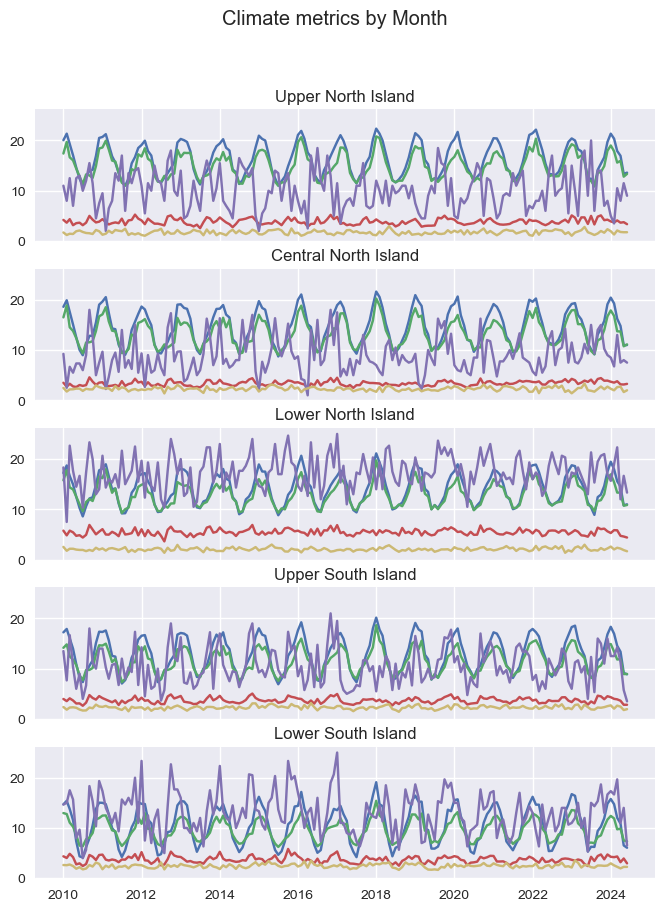

In [51]:
numeric_columns = ['Mean Air Temperature in Celsius', 
                   'Mean Vapour Pressure Hpa', 
                   'Mean Wind Speed M/Sec', 
                   'Days Of Wind Gust >= 24 Knots in Day', 
                   'Standard Deviation Of Daily Mean Temperature in Celsius']

months = uni_climate_electricity['Date'].values.reshape(-1, 1)

fig, axs = plt.subplots(5, sharex= True, sharey=True, figsize=(8, 10))
fig.suptitle('Climate metrics by Month')

axs[0].plot(months, list(uni_climate_electricity[numeric_columns].values))
axs[0].set_title('Upper North Island')

axs[1].plot(months, cni_climate_electricity[numeric_columns].values)
axs[1].set_title('Central North Island')

axs[2].plot(months, lni_climate_electricity[numeric_columns].values)
axs[2].set_title('Lower North Island')

axs[3].plot(months, usi_climate_electricity[numeric_columns].values)
axs[3].set_title('Upper South Island')

axs[4].plot(months, lsi_climate_electricity[numeric_columns].values)
axs[4].set_title('Lower South Island')

Text(0.5, 1.0, 'Lower South Island')

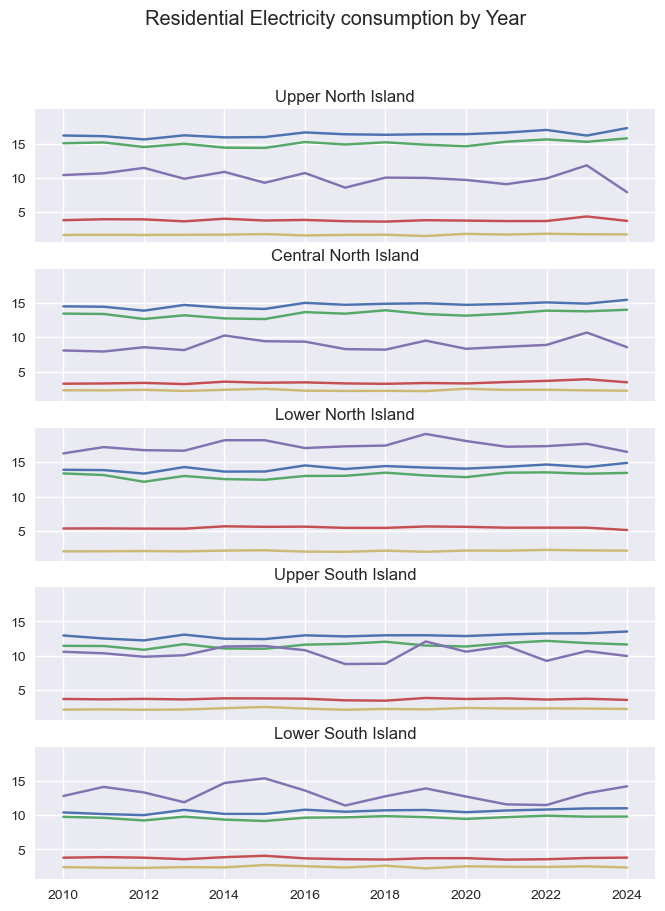

In [52]:

numeric_columns = ['Mean Air Temperature in Celsius', 
                   'Mean Vapour Pressure Hpa', 
                   'Mean Wind Speed M/Sec', 
                   'Days Of Wind Gust >= 24 Knots in Day', 
                   'Standard Deviation Of Daily Mean Temperature in Celsius']

years = uni_byyear['Year'].values.reshape(-1, 1)

fig, axs = plt.subplots(5, sharex= True, sharey=True, figsize=(8, 10))
fig.suptitle('Residential Electricity consumption by Year')

axs[0].plot(years, uni_byyear[numeric_columns].values)
axs[0].set_title('Upper North Island')


axs[1].plot(years, cni_byyear[numeric_columns].values)
axs[1].set_title('Central North Island')

axs[2].plot(years, lni_byyear[numeric_columns].values)
axs[2].set_title('Lower North Island')

axs[3].plot(years, usi_byyear[numeric_columns].values)
axs[3].set_title('Upper South Island')

axs[4].plot(years, lsi_byyear[numeric_columns].values)
axs[4].set_title('Lower South Island')




Text(0.5, 1.0, 'Lower South Island')

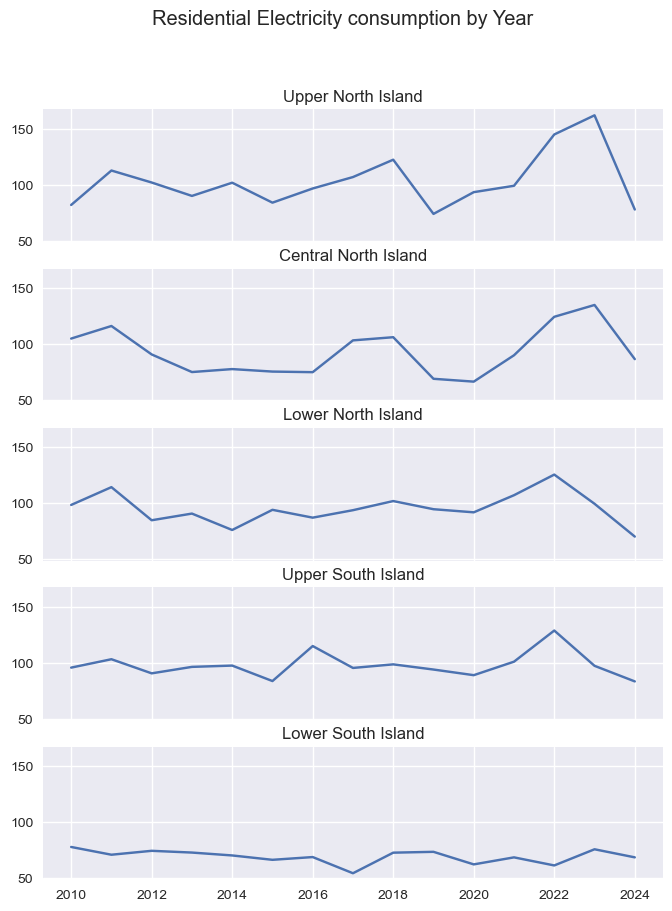

In [53]:
numeric_columns = ['Total Rainfall Mm']

fig, axs = plt.subplots(5, sharex= True, sharey=True, figsize=(8, 10))
fig.suptitle('Residential Electricity consumption by Year')

axs[0].plot(years, uni_byyear[numeric_columns].values)
axs[0].set_title('Upper North Island')


axs[1].plot(years, cni_byyear[numeric_columns].values)
axs[1].set_title('Central North Island')

axs[2].plot(years, lni_byyear[numeric_columns].values)
axs[2].set_title('Lower North Island')

axs[3].plot(years, usi_byyear[numeric_columns].values)
axs[3].set_title('Upper South Island')

axs[4].plot(years, lsi_byyear[numeric_columns].values)
axs[4].set_title('Lower South Island')


# Export/ import data and population data

Text(0.5, 1.0, 'Lower South Island')

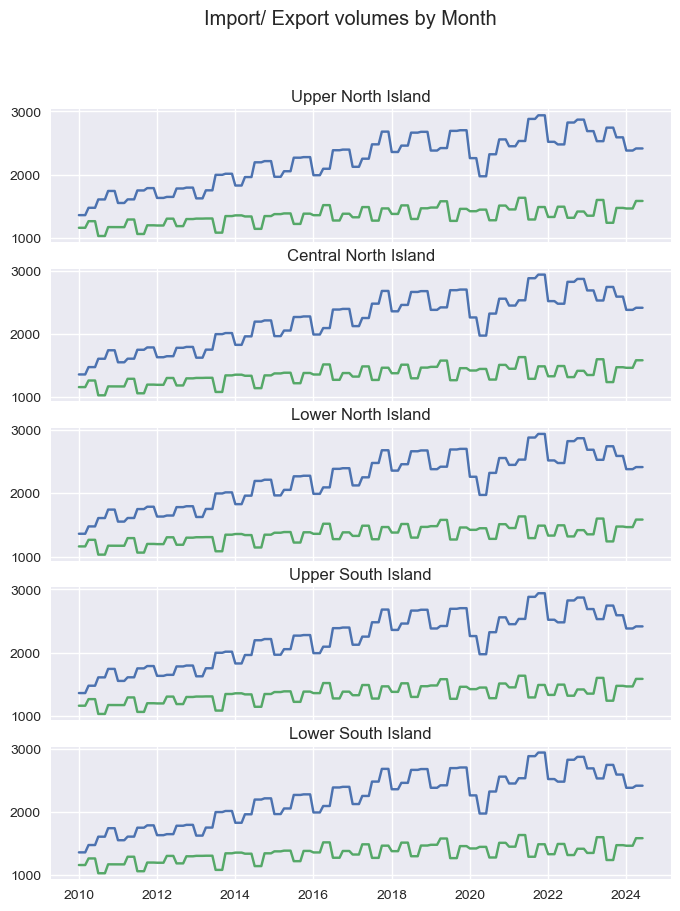

In [54]:
numeric_columns = ['Import volumes', 'Export volumes']

months = uni_climate_electricity['Date'].values.reshape(-1, 1)

fig, axs = plt.subplots(5, sharex= True, sharey=True, figsize=(8, 10))
fig.suptitle('Import/ Export volumes by Month')

axs[0].plot(months, list(uni_climate_electricity[numeric_columns].values))
axs[0].set_title('Upper North Island')

axs[1].plot(months, cni_climate_electricity[numeric_columns].values)
axs[1].set_title('Central North Island')

axs[2].plot(months, lni_climate_electricity[numeric_columns].values)
axs[2].set_title('Lower North Island')

axs[3].plot(months, usi_climate_electricity[numeric_columns].values)
axs[3].set_title('Upper South Island')

axs[4].plot(months, lsi_climate_electricity[numeric_columns].values)
axs[4].set_title('Lower South Island')

Text(0.5, 1.0, 'Lower South Island')

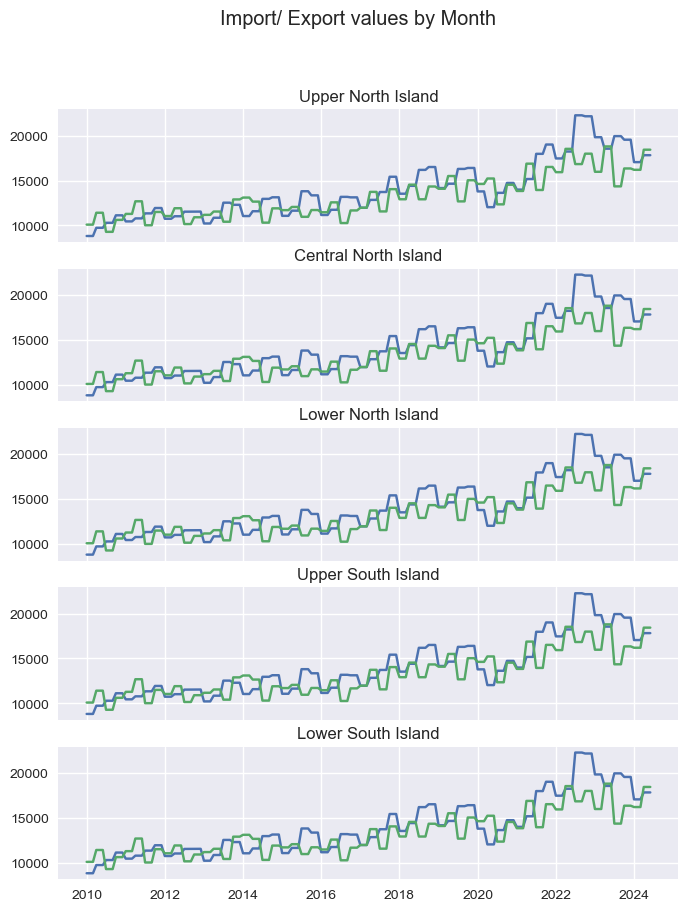

In [55]:
numeric_columns = ['Import values', 'Export values']

months = uni_climate_electricity['Date'].values.reshape(-1, 1)

fig, axs = plt.subplots(5, sharex= True, sharey=True, figsize=(8, 10))
fig.suptitle('Import/ Export values by Month')

axs[0].plot(months, list(uni_climate_electricity[numeric_columns].values))
axs[0].set_title('Upper North Island')

axs[1].plot(months, cni_climate_electricity[numeric_columns].values)
axs[1].set_title('Central North Island')

axs[2].plot(months, lni_climate_electricity[numeric_columns].values)
axs[2].set_title('Lower North Island')

axs[3].plot(months, usi_climate_electricity[numeric_columns].values)
axs[3].set_title('Upper South Island')

axs[4].plot(months, lsi_climate_electricity[numeric_columns].values)
axs[4].set_title('Lower South Island')

Text(0.5, 1.0, 'Lower South Island')

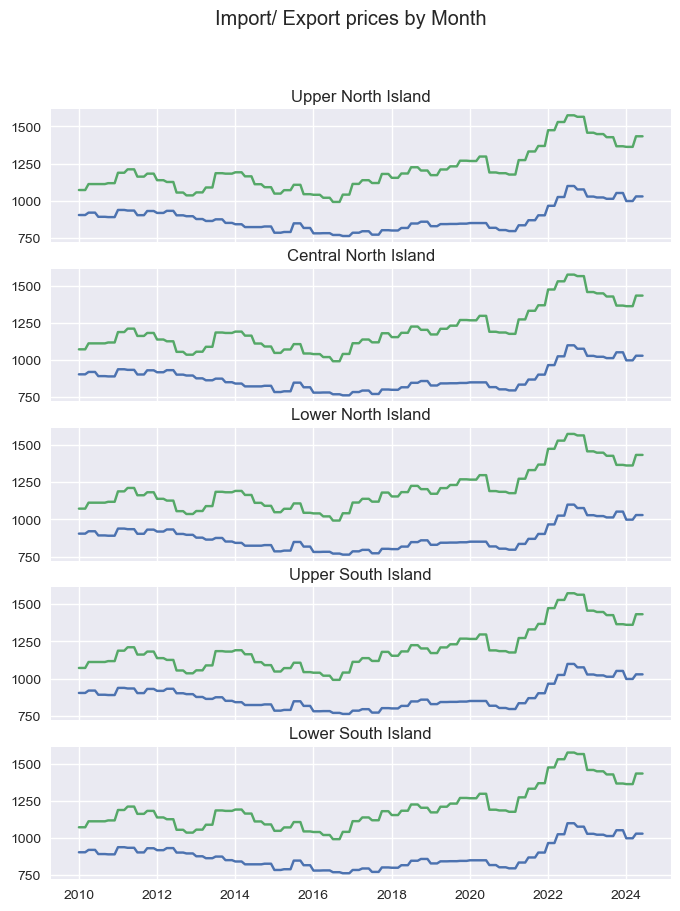

In [56]:
numeric_columns = ['Import prices', 'Export prices']

months = uni_climate_electricity['Date'].values.reshape(-1, 1)

fig, axs = plt.subplots(5, sharex= True, sharey=True, figsize=(8, 10))
fig.suptitle('Import/ Export prices by Month')

axs[0].plot(months, list(uni_climate_electricity[numeric_columns].values))
axs[0].set_title('Upper North Island')

axs[1].plot(months, cni_climate_electricity[numeric_columns].values)
axs[1].set_title('Central North Island')

axs[2].plot(months, lni_climate_electricity[numeric_columns].values)
axs[2].set_title('Lower North Island')

axs[3].plot(months, usi_climate_electricity[numeric_columns].values)
axs[3].set_title('Upper South Island')

axs[4].plot(months, lsi_climate_electricity[numeric_columns].values)
axs[4].set_title('Lower South Island')

Text(0.5, 1.0, 'Lower South Island')

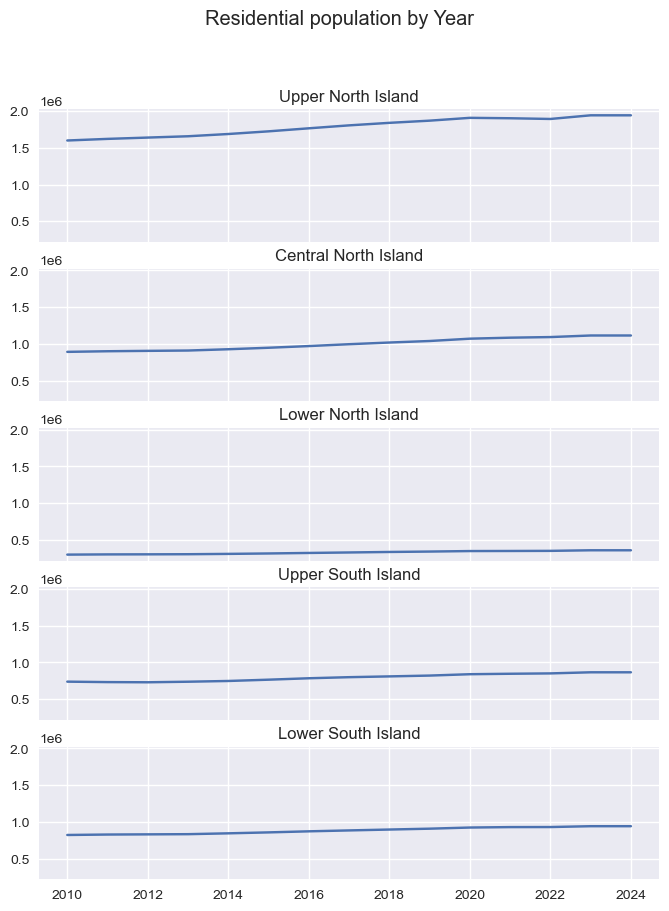

In [57]:
numeric_columns = ['Population']

fig, axs = plt.subplots(5, sharex= True, sharey=True, figsize=(8, 10))
fig.suptitle('Residential population by Year')

axs[0].plot(years, uni_byyear[numeric_columns].values)
axs[0].set_title('Upper North Island')


axs[1].plot(years, cni_byyear[numeric_columns].values)
axs[1].set_title('Central North Island')

axs[2].plot(years, lni_byyear[numeric_columns].values)
axs[2].set_title('Lower North Island')

axs[3].plot(years, usi_byyear[numeric_columns].values)
axs[3].set_title('Upper South Island')

axs[4].plot(years, lsi_byyear[numeric_columns].values)
axs[4].set_title('Lower South Island')


## Electricity Data

#### Electricity Business Data

C:\Users\Jackson\AppData\Local\Temp\ipykernel_12464\513554952.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels([j.get_text() for j in axs.get_xticklabels()], family='Times New Roman')
C:\Users\Jackson\AppData\Local\Temp\ipykernel_12464\513554952.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels([j.get_text() for j in axs.get_yticklabels()], family='Times New Roman')


Text(0, 0.5, 'Selected business demand (GWh)')

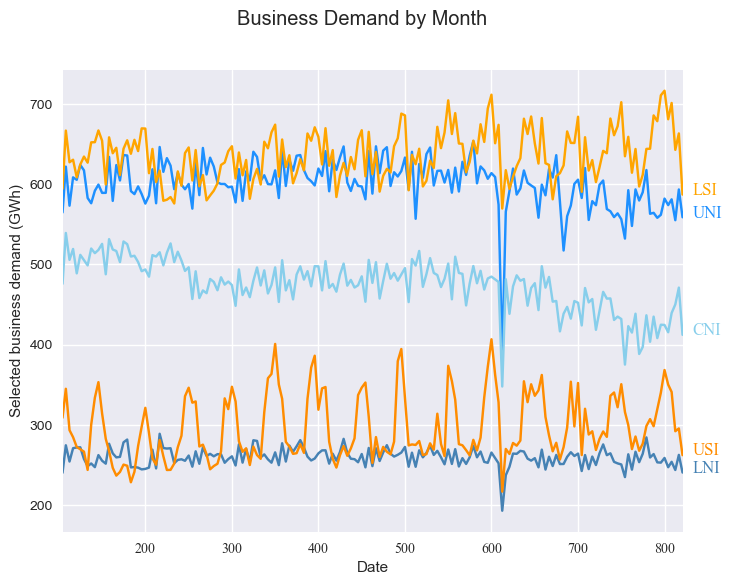

In [58]:
plt.rcParams["font.serif"] = ["Times New Roman"]
numeric_columns = ['Selected business demand (GWh)']

months = uni_climate_electricity['Date'].values.reshape(-1, 1)

fig, axs = plt.subplots(figsize=(8, 6))
fig.suptitle('Business Demand by Month', family='Times New Roman')

month_shift = months[-1] + pd.Timedelta(weeks=12)

label = 'UNI'
color = 'dodgerblue'
axs.plot(months, uni_climate_electricity[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (months[-1], uni_climate_electricity[numeric_columns].values[-1]),
  xytext = (month_shift, uni_climate_electricity[numeric_columns].values[-1]),
  color  = color,family='Times New Roman'
)


label = 'CNI'
color = 'skyblue'
axs.plot(months, cni_climate_electricity[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (months[-1], cni_climate_electricity[numeric_columns].values[-1]),
  xytext = (month_shift, cni_climate_electricity[numeric_columns].values[-1]),
  color  = color,family='Times New Roman'
)


label = 'LNI'
color = 'steelblue'
axs.plot(months, lni_climate_electricity[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (months[-1], lni_climate_electricity[numeric_columns].values[-1]),
  xytext = (month_shift, lni_climate_electricity[numeric_columns].values[-1]),
  color  = color,family='Times New Roman'
)

label = 'USI'
color = 'darkorange'
axs.plot(months, usi_climate_electricity[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (months[-1], usi_climate_electricity[numeric_columns].values[-1]),
  xytext = (month_shift, usi_climate_electricity[numeric_columns].values[-1]),
  color  = color, family='Times New Roman'
)


label = 'LSI'
color = 'orange'
axs.plot(months, lsi_climate_electricity[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (months[-1], lsi_climate_electricity[numeric_columns].values[-1]),
  xytext = (month_shift, lsi_climate_electricity[numeric_columns].values[-1]),
  color  = color, family='Times New Roman'
)

#axs.axvline(x=months[-51], color='black', linestyle='--')
axs.set_xticklabels([j.get_text() for j in axs.get_xticklabels()], family='Times New Roman')
axs.set_xticklabels([j.get_text() for j in axs.get_yticklabels()], family='Times New Roman')

axs.set_xlim(months[1], months[-1])

axs.set_xlabel('Date', family='Times New Roman')
axs.set_ylabel('Selected business demand (GWh)', family='Times New Roman')




Text(0, 0.5, 'Selected business demand (GWh)')

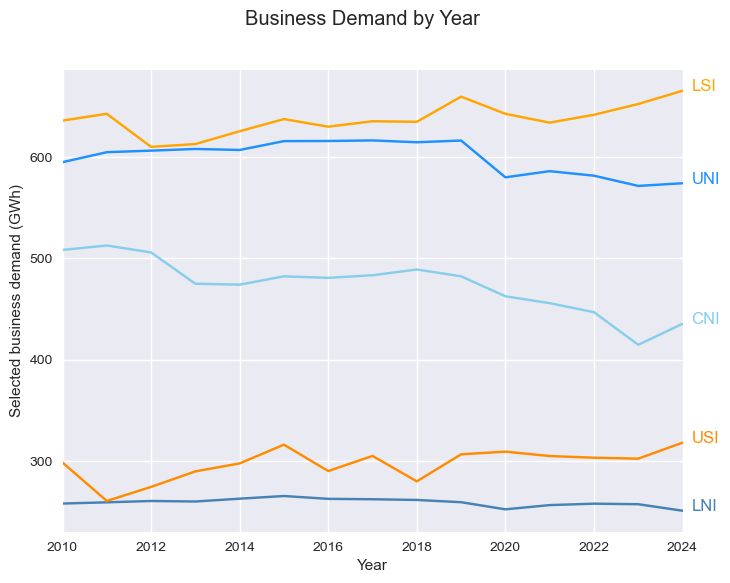

In [59]:
numeric_columns = ['Selected business demand (GWh)']
year_offset = years[-1] + 0.2

fig, axs = plt.subplots(figsize=(8, 6))
fig.suptitle('Business Demand by Year')


label = 'UNI'
color = 'dodgerblue'
axs.plot(years, uni_byyear[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (years[-1], uni_byyear[numeric_columns].values[-1]),
  xytext = (year_offset, uni_byyear[numeric_columns].values[-1]),
  color  = color,
)


label = 'CNI'
color = 'skyblue'
axs.plot(years, cni_byyear[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (years[-1], cni_byyear[numeric_columns].values[-1]),
  xytext = (year_offset, cni_byyear[numeric_columns].values[-1]),
  color  = color,
)


label = 'LNI'
color = 'steelblue'
axs.plot(years, lni_byyear[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (years[-1,], lni_byyear[numeric_columns].values[-1]),
  xytext = (year_offset, lni_byyear[numeric_columns].values[-1]),
  color  = color,
)

label = 'USI'
color = 'darkorange'
axs.plot(years, usi_byyear[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (years[-1], usi_byyear[numeric_columns].values[-1]),
  xytext = (year_offset, usi_byyear[numeric_columns].values[-1]),
  color  = color,
)


label = 'LSI'
color = 'orange'
axs.plot(years, lsi_byyear[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (years[-1], lsi_byyear[numeric_columns].values[-1]),
  xytext = (year_offset, lsi_byyear[numeric_columns].values[-1]),
  color  = color,
)

axs.set_xlim(2010, years[-1])

axs.set_xlabel('Year')
axs.set_ylabel('Selected business demand (GWh)')




#### Electricity Residential Data

C:\Users\Jackson\AppData\Local\Temp\ipykernel_12464\2224958473.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels([j.get_text() for j in axs.get_xticklabels()], family='Times New Roman')
C:\Users\Jackson\AppData\Local\Temp\ipykernel_12464\2224958473.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels([j.get_text() for j in axs.get_yticklabels()], family='Times New Roman')


Text(0, 0.5, 'Est. Total consumption (GWh)')

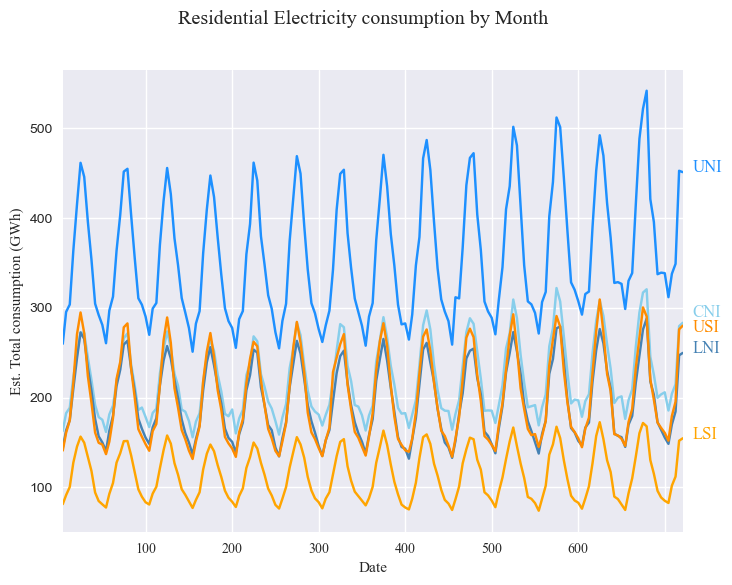

In [60]:
plt.rcParams["font.serif"] = ["Times New Roman"]
numeric_columns = ['Est. Total consumption (GWh)']
months = uni_climate_electricity['Date'].values.reshape(-1, 1)

fig, axs = plt.subplots(figsize=(8, 6))
fig.suptitle('Residential Electricity consumption by Month', family='Times New Roman')

month_shift = months[-1] + pd.Timedelta(weeks=12)

label = 'UNI'
color = 'dodgerblue'
axs.plot(months, uni_climate_electricity[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (months[-1], uni_climate_electricity[numeric_columns].values[-1]),
  xytext = (month_shift, uni_climate_electricity[numeric_columns].values[-1]),
  color  = color, family='Times New Roman'
)


label = 'CNI'
color = 'skyblue'
axs.plot(months, cni_climate_electricity[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (months[-1], cni_climate_electricity[numeric_columns].values[-1]),
  xytext = (month_shift, cni_climate_electricity[numeric_columns].values[-1]+7),
  color  = color, family='Times New Roman'
)


label = 'LNI'
color = 'steelblue'
axs.plot(months, lni_climate_electricity[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (months[-1], lni_climate_electricity[numeric_columns].values[-1]),
  xytext = (month_shift, lni_climate_electricity[numeric_columns].values[-1]),
  color  = color, family='Times New Roman'
)

label = 'USI'
color = 'darkorange'
axs.plot(months, usi_climate_electricity[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (months[-1], usi_climate_electricity[numeric_columns].values[-1]),
  xytext = (month_shift, usi_climate_electricity[numeric_columns].values[-1]-7),
  color  = color, family='Times New Roman'
)


label = 'LSI'
color = 'orange'
axs.plot(months, lsi_climate_electricity[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (months[-1], lsi_climate_electricity[numeric_columns].values[-1]),
  xytext = (month_shift, lsi_climate_electricity[numeric_columns].values[-1]),
  color  = color, family='Times New Roman'
)

axs.set_xlim(months[1], months[-1])

axs.set_xticklabels([j.get_text() for j in axs.get_xticklabels()], family='Times New Roman')
axs.set_xticklabels([j.get_text() for j in axs.get_yticklabels()], family='Times New Roman')

axs.set_xlabel('Date', family='Times New Roman')
axs.set_ylabel('Est. Total consumption (GWh)', family='Times New Roman')




Text(0, 0.5, 'Est. Total consumption (GWh)')

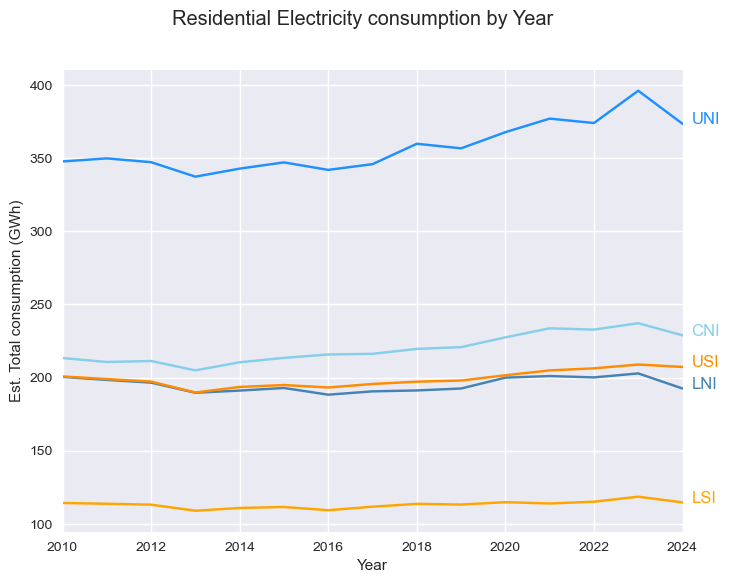

In [61]:
numeric_columns = ['Est. Total consumption (GWh)']

fig, axs = plt.subplots(figsize=(8, 6))
fig.suptitle('Residential Electricity consumption by Year')

year_offset = years[-1] + 0.2

label = 'UNI'
color = 'dodgerblue'
axs.plot(years, uni_byyear[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (years[-1], uni_byyear[numeric_columns].values[-1]),
  xytext = (year_offset, uni_byyear[numeric_columns].values[-1]),
  color  = color,
)


label = 'CNI'
color = 'skyblue'
axs.plot(years, cni_byyear[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (years[-1], cni_byyear[numeric_columns].values[-1]),
  xytext = (year_offset, cni_byyear[numeric_columns].values[-1]),
  color  = color,
)


label = 'LNI'
color = 'steelblue'
axs.plot(years, lni_byyear[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (years[-1,], lni_byyear[numeric_columns].values[-1]),
  xytext = (year_offset, lni_byyear[numeric_columns].values[-1]),
  color  = color,
)

label = 'USI'
color = 'darkorange'
axs.plot(years, usi_byyear[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (years[-1], usi_byyear[numeric_columns].values[-1]),
  xytext = (year_offset, usi_byyear[numeric_columns].values[-1]),
  color  = color,
)


label = 'LSI'
color = 'orange'
axs.plot(years, lsi_byyear[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (years[-1], lsi_byyear[numeric_columns].values[-1]),
  xytext = (year_offset, lsi_byyear[numeric_columns].values[-1]),
  color  = color,
)


axs.set_xlim(2010, years[-1])

axs.set_xlabel('Year')
axs.set_ylabel('Est. Total consumption (GWh)')




### Correlation visualisation

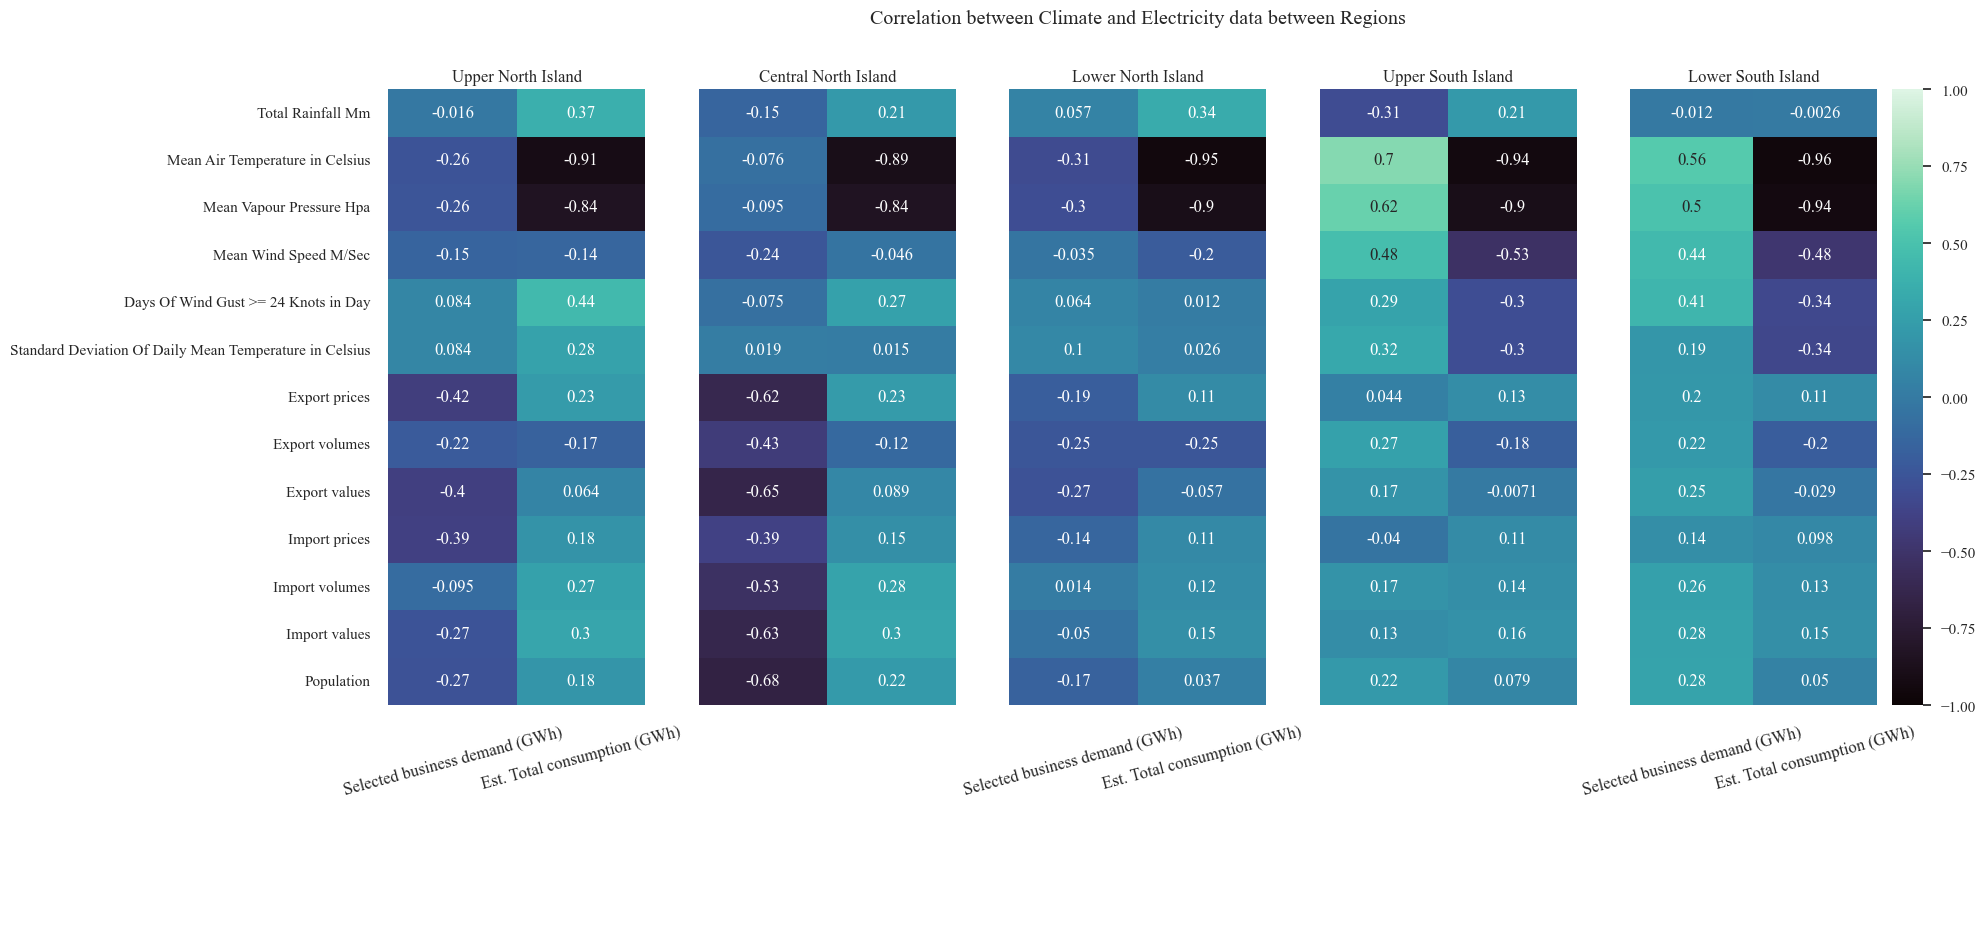

In [62]:
sns.set_theme(font = 'Times New Roman', style="whitegrid")
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(20, 8), sharey=True, sharex=True, gridspec_kw=dict(width_ratios=[1,1,1,1,1.2]))

fig.suptitle('Correlation between Climate and Electricity data between Regions')

sns.heatmap(uni_climate_electricity.corr().iloc[5:, 3:5][['Selected business demand (GWh)', 'Est. Total consumption (GWh)']],
      vmin=-1, vmax=1, annot=True, ax=ax1, cbar=False, cmap='mako')
ax1.set_title('Upper North Island')
ax1.set_xticklabels(['Selected business demand (GWh)', 'Est. Total consumption (GWh)'], rotation=15, fontsize = 12)

sns.heatmap(cni_climate_electricity.corr().iloc[5:, 3:5][['Selected business demand (GWh)', 'Est. Total consumption (GWh)']],
      vmin=-1, vmax=1, annot=True, ax=ax2, cbar=False, cmap='mako')
ax2.set_title('Central North Island')
ax2.set_xticklabels(['Selected business demand (GWh)', 'Est. Total consumption (GWh)'], color='white')

sns.heatmap(lni_climate_electricity.corr().iloc[5:, 3:5][['Selected business demand (GWh)', 'Est. Total consumption (GWh)']],
      vmin=-1, vmax=1, annot=True, ax=ax3, cbar=False, cmap='mako')
ax3.set_title('Lower North Island')
ax3.set_xticklabels(['Selected business demand (GWh)', 'Est. Total consumption (GWh)'], rotation=15, fontsize = 12)

sns.heatmap(usi_climate_electricity.corr().iloc[5:, 3:5][['Selected business demand (GWh)', 'Est. Total consumption (GWh)']],
      vmin=-1, vmax=1, annot=True, ax=ax4, cbar=False, cmap='mako')
ax4.set_title('Upper South Island')
ax4.set_xticklabels(['Selected business demand (GWh)', 'Est. Total consumption (GWh)'], color='white')

sns.heatmap(lsi_climate_electricity.corr().iloc[5:, 3:5][['Selected business demand (GWh)', 'Est. Total consumption (GWh)']],
      vmin=-1, vmax=1, annot=True, ax=ax5, cmap='mako')
ax5.set_title('Lower South Island')
ax5.set_xticklabels(['Selected business demand (GWh)', 'Est. Total consumption (GWh)'], rotation=15, fontsize = 12)

plt.show()





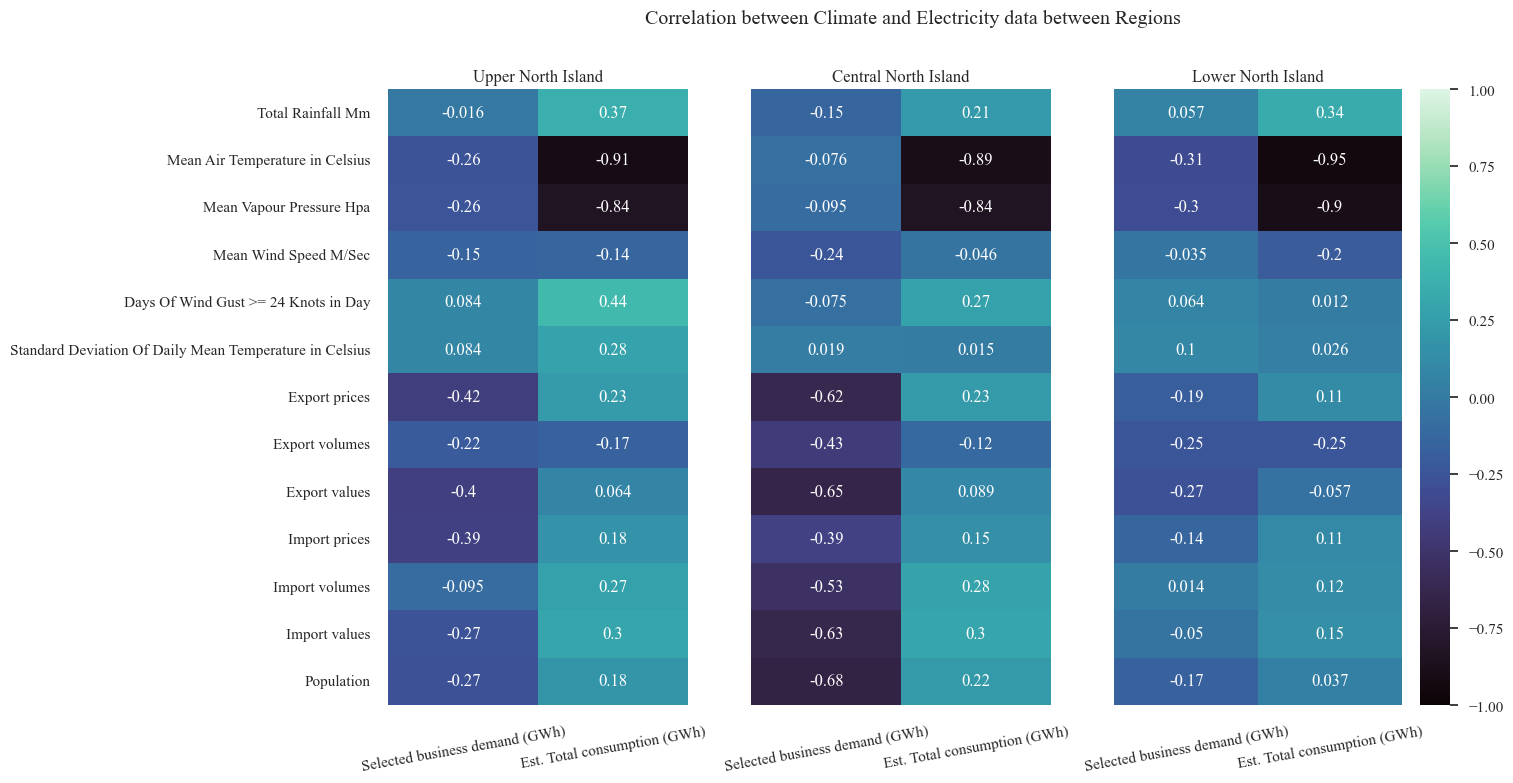

In [63]:
sns.set_theme(font = 'Times New Roman', style="whitegrid")

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14, 8), sharey=True, sharex=True, gridspec_kw=dict(width_ratios=[1,1,1.2]))

fig.suptitle('Correlation between Climate and Electricity data between Regions')

sns.heatmap(uni_climate_electricity.corr().iloc[5:, 3:5][['Selected business demand (GWh)', 'Est. Total consumption (GWh)']],
      vmin=-1, vmax=1, annot=True, ax=ax1, cbar=False, cmap='mako')
ax1.set_title('Upper North Island')
ax1.set_xticklabels(['Selected business demand (GWh)', 'Est. Total consumption (GWh)'], rotation=10)

sns.heatmap(cni_climate_electricity.corr().iloc[5:, 3:5][['Selected business demand (GWh)', 'Est. Total consumption (GWh)']],
      vmin=-1, vmax=1, annot=True, ax=ax2, cbar=False, cmap='mako')
ax2.set_title('Central North Island')
ax2.set_xticklabels(['Selected business demand (GWh)', 'Est. Total consumption (GWh)'], rotation=10)

sns.heatmap(lni_climate_electricity.corr().iloc[5:, 3:5][['Selected business demand (GWh)', 'Est. Total consumption (GWh)']],
      vmin=-1, vmax=1, annot=True, ax=ax3, cmap='mako')
ax3.set_title('Lower North Island')
ax3.set_xticklabels(['Selected business demand (GWh)', 'Est. Total consumption (GWh)'], rotation=10)



plt.show()





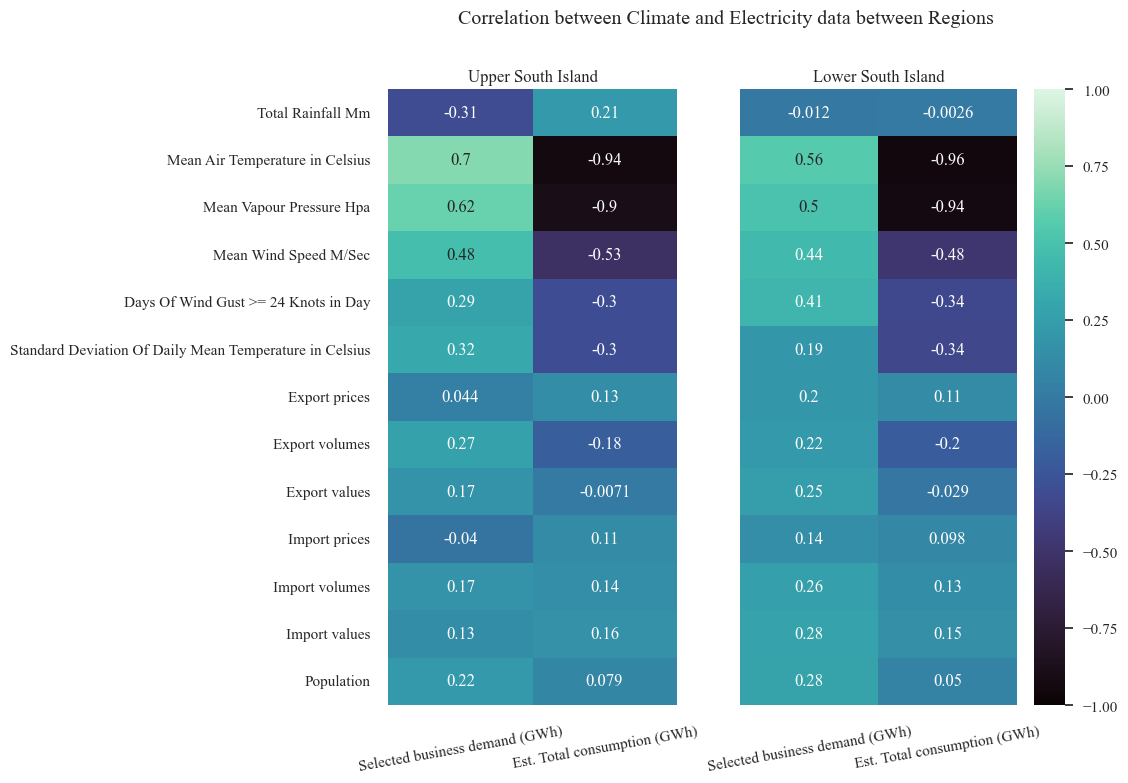

In [64]:

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(9, 8), sharey=True, sharex=True, gridspec_kw=dict(width_ratios=[1,1.2]))

fig.suptitle('Correlation between Climate and Electricity data between Regions')

sns.heatmap(usi_climate_electricity.corr().iloc[5:, 3:5][['Selected business demand (GWh)', 'Est. Total consumption (GWh)']],
      vmin=-1, vmax=1, annot=True, ax=ax1, cbar=False, cmap='mako')
ax1.set_title('Upper South Island')
ax1.set_xticklabels(['Selected business demand (GWh)', 'Est. Total consumption (GWh)'], rotation=10)

sns.heatmap(lsi_climate_electricity.corr().iloc[5:, 3:5][['Selected business demand (GWh)', 'Est. Total consumption (GWh)']],
      vmin=-1, vmax=1, annot=True, ax=ax2, cmap='mako')
ax2.set_title('Lower South Island')
ax2.set_xticklabels(['Selected business demand (GWh)', 'Est. Total consumption (GWh)'], rotation=10)



plt.show()





sns.heatmap(uni_climate_electricity.corr().iloc[3:,3:], annot=True, cmap='mako', annot_kws={"size": 6})
sns.heatmap(cni_climate_electricity.corr().iloc[3:,3:], annot=True, cmap='mako', annot_kws={"size": 6})
sns.heatmap(lni_climate_electricity.corr().iloc[3:,3:], annot=True, cmap='mako', annot_kws={"size": 6})
sns.heatmap(usi_climate_electricity.corr().iloc[3:,3:], annot=True, cmap='mako', annot_kws={"size": 6})
sns.heatmap(lsi_climate_electricity.corr().iloc[3:,3:], annot=True, cmap='mako', annot_kws={"size": 6})


### Plots for Richard

##### Residential

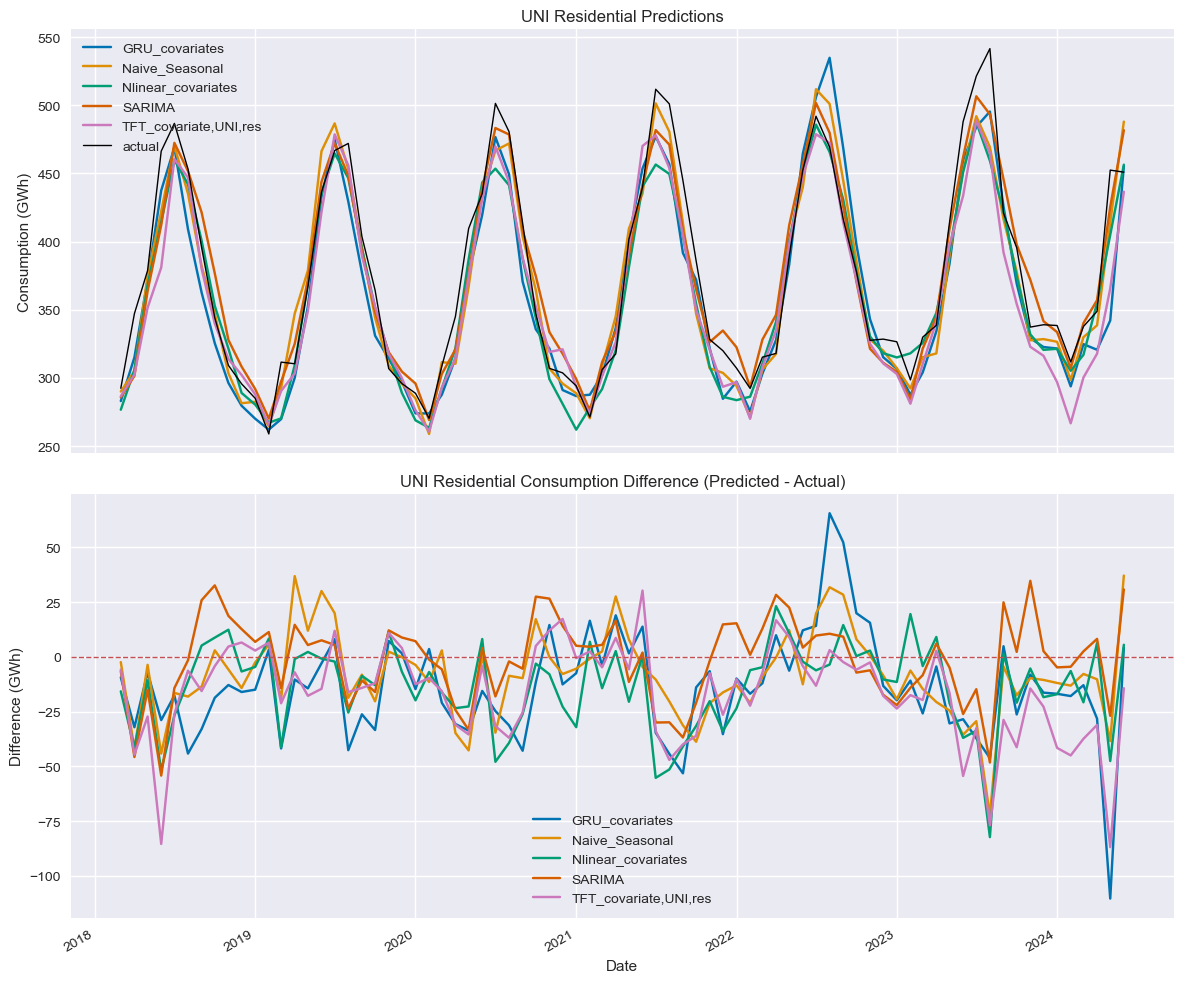

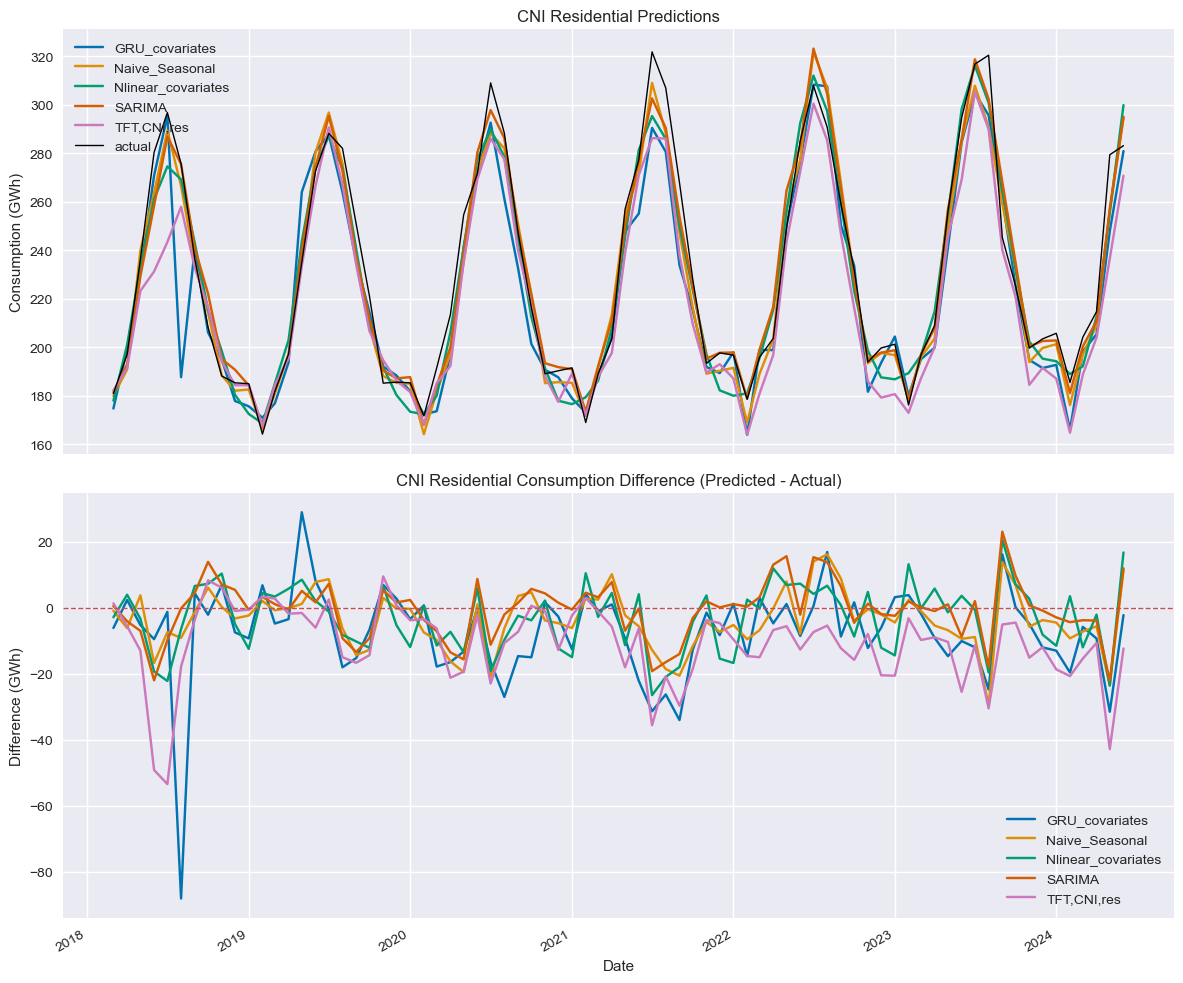

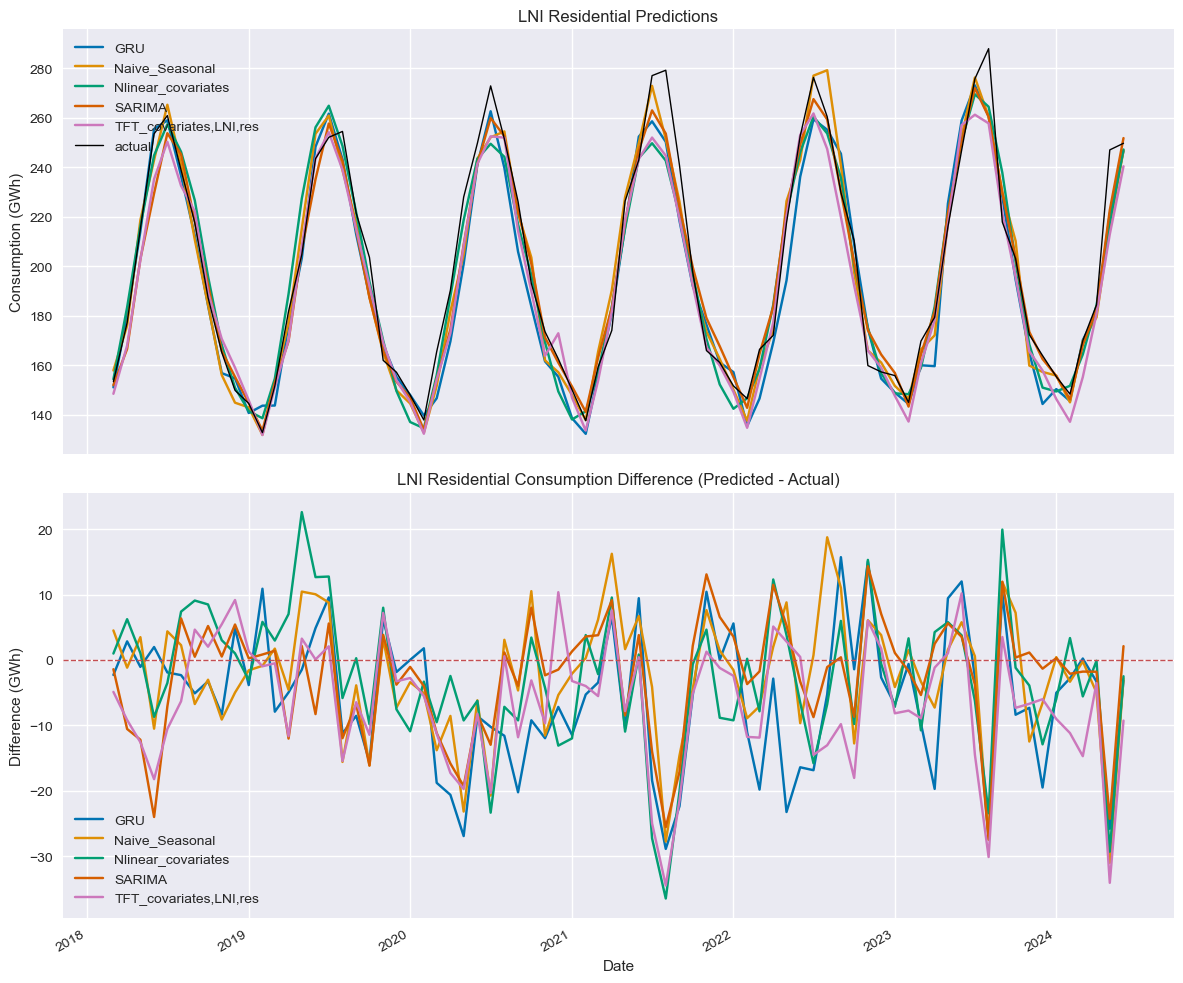

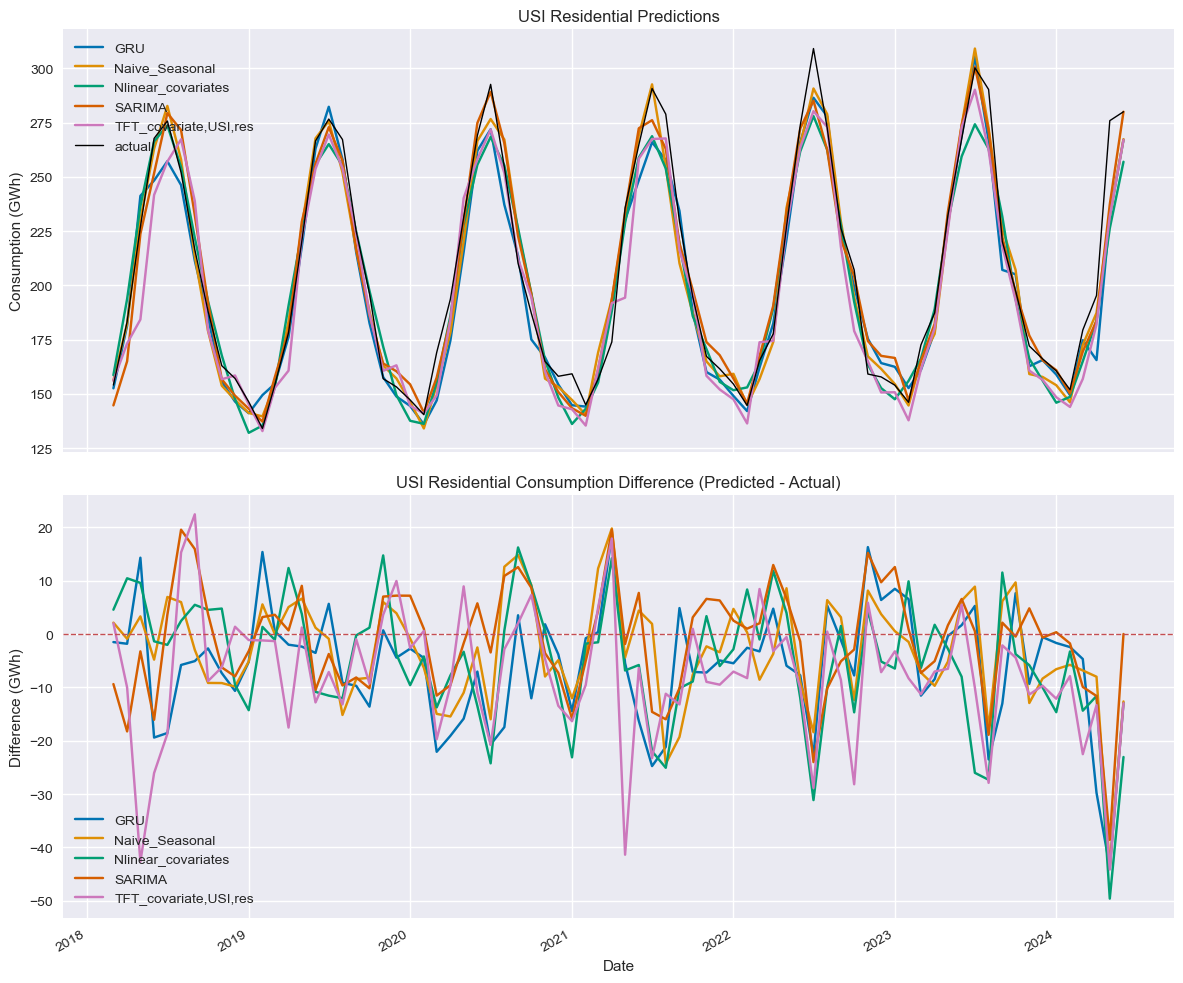

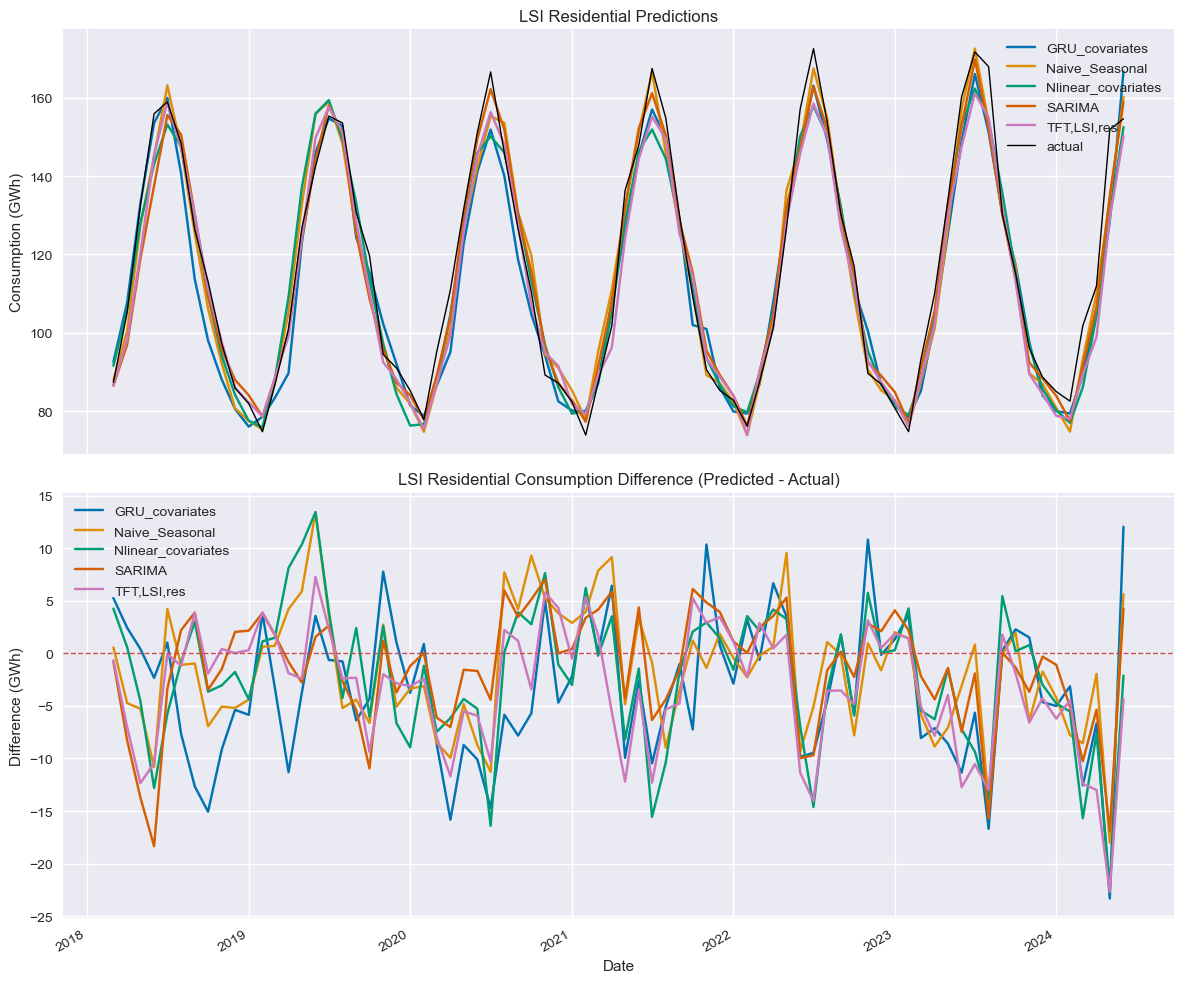

In [65]:
zones = ['uni', 'cni', 'lni', 'usi', 'lsi']

plt.style.use('seaborn-v0_8')
color_palette = sns.color_palette("colorblind", 10)

for zone in zones:
    directory = '../plotting/res/' + zone
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=False)
    csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]
    for i, csv_file in enumerate(csv_files):
        file_path = os.path.join(directory, csv_file)
        if csv_file.lower().find('tft') != -1:
            model_params = csv_file.split('.')[0]
        else:
            model_params = csv_file.split(',')[0]
        df = pd.read_csv(file_path, parse_dates=[0], index_col=0)
        color = color_palette[i % len(color_palette)]
        ax1.plot(df.index, df['predictions'], label=model_params, color=color)
        ax2.plot(df.index, df['difference'], label=model_params, color=color)
        if csv_file == csv_files[-1]:
            ax1.plot(df.index, df['actual'], label='actual', color='black', linewidth=1)
    
    ax1.set_title(zone.upper() + ' Residential Predictions')
    ax1.set_ylabel('Consumption (GWh)')
    ax1.legend()
    
    ax2.set_title(zone.upper() + ' Residential Consumption Difference (Predicted - Actual)')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Difference (GWh)')
    ax2.axhline(y=0, color='r', linestyle='--', linewidth=1)  # Add a horizontal line at y=0
    ax2.legend()
    
    fig.autofmt_xdate()
    
    # Use tight layout to prevent the labels from being cut off
    plt.tight_layout()
    
    # Show the plot
    plt.show()

zones = ['uni', 'cni', 'lni', 'usi', 'lsi']
csv_files = []

for zone in zones:
    directory = '../plotting/res/' + zone
    csv_files.extend([directory+f for f in os.listdir(directory) if f.endswith('.csv')])

csv_files

for i in range(0, len(csv_files)): # Fir eacg zone, csv files are read and plotted
        
        if i < 5: # All upper north island
             print(csv_files[i])

        if  i > 4 and i < 10: # All central north island

        if i > 9 and i < 15 : # All lower north island
              print(csv_files[i])

        if i > 14 and i < 20: # All upper south island

        if i > 19 and i < 25: # All lower south island


C:\Users\Jackson\AppData\Local\Temp\ipykernel_12464\1748232727.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  i.set_xticklabels([j.get_text() for j in i.get_xticklabels()], family='Times New Roman')
C:\Users\Jackson\AppData\Local\Temp\ipykernel_12464\1748232727.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  i.set_yticklabels([j.get_text() for j in i.get_yticklabels()], family='Times New Roman')
C:\Users\Jackson\AppData\Local\Temp\ipykernel_12464\1748232727.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  i.set_xticklabels([j.get_text() for j in i.get_xticklabels()], family='Times New Roman')
C:\Users\Jackson\AppData\Local\Temp\ipykernel_12464\1748232727.py:48: UserWarning: set_ticklabels() should only be used with a fixed 

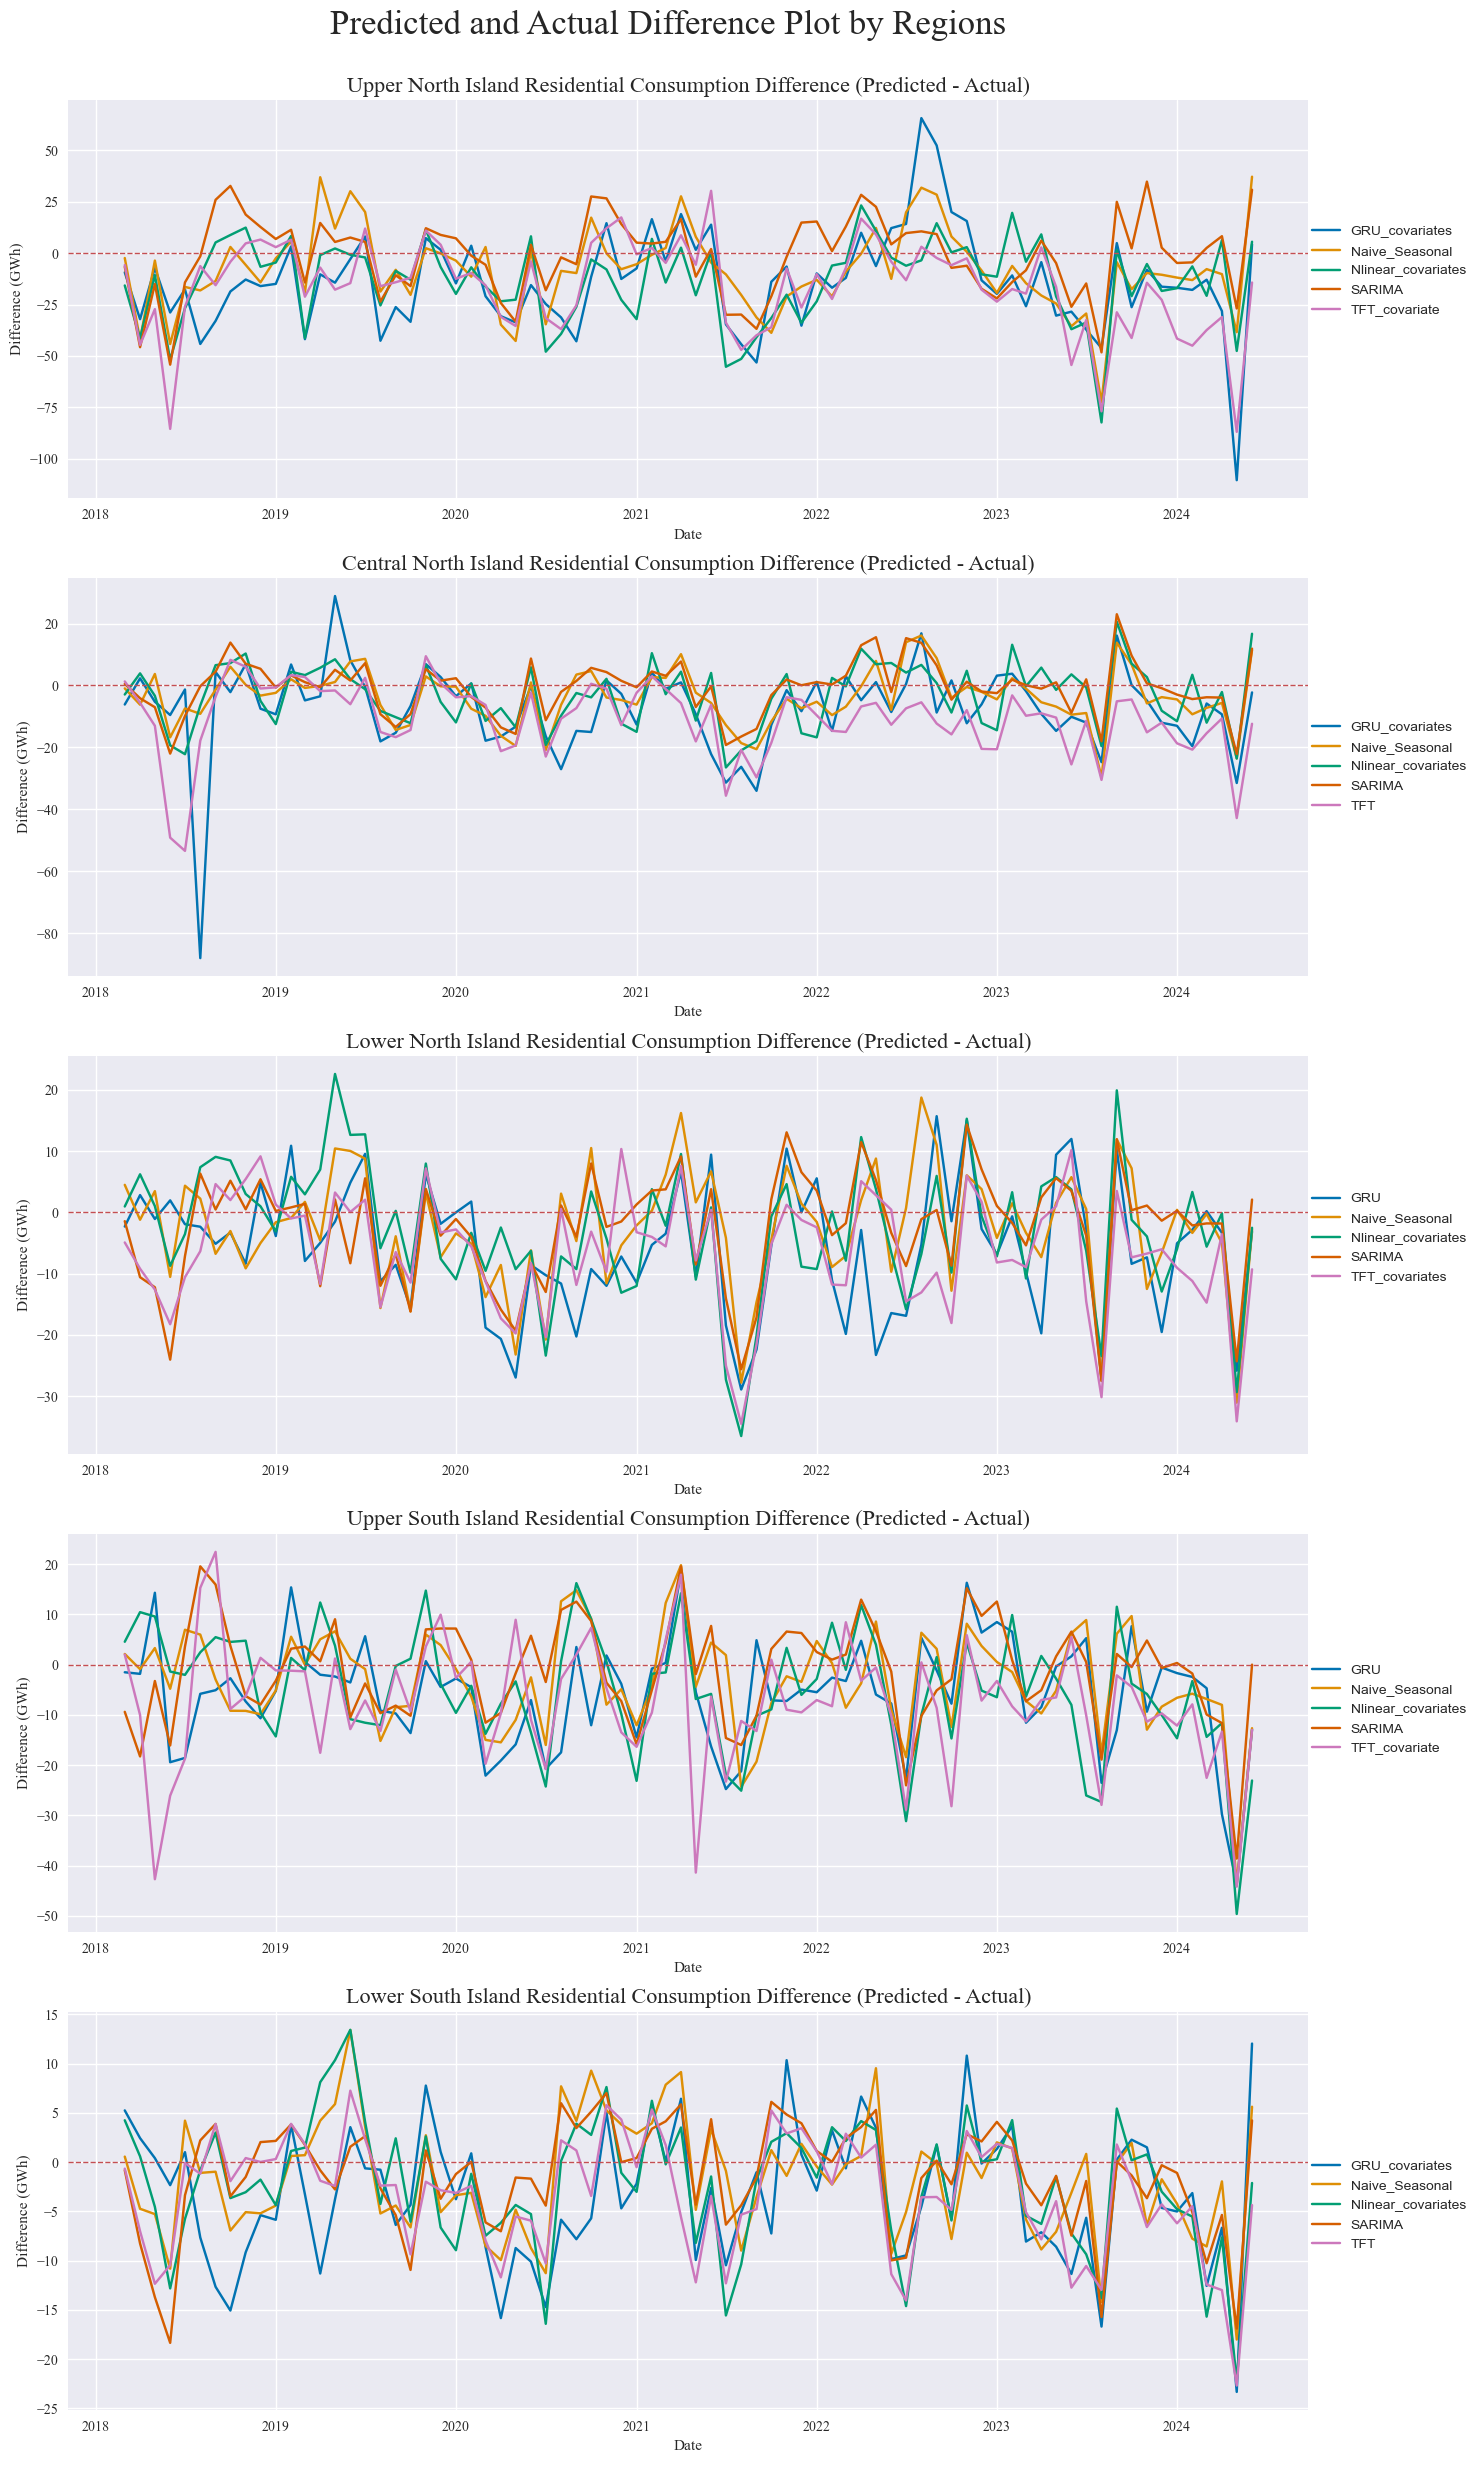

In [66]:
zones = ['uni', 'cni', 'lni', 'usi', 'lsi']
csv_files = []

for zone in zones:
    directory = '../plotting/res/' + zone
    csv_files.extend([directory+"/"+f for f in os.listdir(directory) if f.endswith('.csv')])

color_palette = sns.color_palette("colorblind", 10)

plt.rcParams["font.serif"] = ["Times New Roman"]

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(16, 30), sharex=False)

fig.suptitle('Predicted and Actual Difference Plot by Regions', y=0.91, family='Times New Roman', fontsize = 25)

labels = []

for i in range(0, len(csv_files)): # Fir eacg zone, csv files are read and plotted
    color = color_palette[i % 5]
    if i < 5: # All upper north island
        df = pd.read_csv(csv_files[i], parse_dates=[0], index_col=0)
        ax1.plot(df.index, df['difference'], label=(csv_files[i][20:-12]), color=color)

    if  i > 4 and i < 10: # All central north island
        df = pd.read_csv(csv_files[i], parse_dates=[0], index_col=0)
        ax2.plot(df.index, df['difference'], label=(csv_files[i][20:-12]), color=color)

    if i > 9 and i < 15 : # All lower north island
        df = pd.read_csv(csv_files[i], parse_dates=[0], index_col=0)
        ax3.plot(df.index, df['difference'], label=(csv_files[i][20:-12]), color=color)

    if i > 14 and i < 20: # All upper south island
        df = pd.read_csv(csv_files[i], parse_dates=[0], index_col=0)
        ax4.plot(df.index, df['difference'], label=(csv_files[i][20:-12]), color=color)

    if i > 19 and i < 25: # All lower south island
        df = pd.read_csv(csv_files[i], parse_dates=[0], index_col=0)
        ax5.plot(df.index, df['difference'], label=(csv_files[i][20:-12]), color=color)
    
    labels.extend([csv_files[i][20:-12]])

for i, name in ((ax1, 'Upper North Island'), (ax2, 'Central North Island'), (ax3, 'Lower North Island'), (ax4, 'Upper South Island'), (ax5, 'Lower South Island')):
    i.set_title(name + ' Residential Consumption Difference (Predicted - Actual)', family='Times New Roman', fontsize = 16)
    i.set_xlabel('Date', family='Times New Roman')
    i.set_ylabel('Difference (GWh)', family='Times New Roman')
    i.axhline(y=0, color='r', linestyle='--', linewidth=1)  # Add a horizontal line at y=0
    i.set_xticklabels([j.get_text() for j in i.get_xticklabels()], family='Times New Roman')
    i.set_yticklabels([j.get_text() for j in i.get_yticklabels()], family='Times New Roman')

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels,  loc = (0.89, 0.87))

handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels,  loc = (0.89, 0.67))

handles, labels = ax3.get_legend_handles_labels()
fig.legend(handles, labels,  loc = (0.89, 0.48))

handles, labels = ax4.get_legend_handles_labels()
fig.legend(handles, labels,  loc = (0.89, 0.29))

handles, labels = ax5.get_legend_handles_labels()
fig.legend(handles, labels,  loc = (0.89, 0.09))


In [67]:
# Read the lockdown period Excel file
lockdown_df = pd.read_csv('../plotting/Lockdownperiod.csv')

# Convert the lockdown period dataframe's index to datetime
#lockdown_df.set_index('Unnamed: 0', inplace=True)

# Convert the lockdown period dataframe's index to datetime
lockdown_df['Unnamed: 0'] = pd.to_datetime(lockdown_df['Unnamed: 0'], format='%d/%m/%Y')
lockdown_df.set_index('Unnamed: 0', inplace=True)

# Define color mapping for lockdown statuses
lockdown_colors = {'red': 'lightcoral', 'orange': 'orange', 'yellow': 'khaki'}

In [68]:
lockdown_df

UNI     CNI     LNI     USI     LSI
Unnamed: 0                                        
2020-03-01     red     red     red     red     red
2020-04-01     red     red     red     red     red
2020-05-01  orange  orange  orange  orange  orange
2020-06-01  yellow  yellow  yellow  yellow  yellow
2020-07-01  yellow  yellow  yellow  yellow  yellow
2020-08-01  orange  yellow  yellow  yellow  yellow
2020-09-01  yellow  yellow  yellow  yellow  yellow
2020-10-01  yellow  yellow  yellow  yellow  yellow
2020-11-01  yellow  yellow  yellow  yellow  yellow
2020-12-01  yellow  yellow  yellow  yellow  yellow
2021-01-01  yellow  yellow  yellow  yellow  yellow
2021-02-01  orange  yellow  yellow  yellow  yellow
2021-03-01  orange  yellow  yellow  yellow  yellow
2021-04-01  yellow  yellow  yellow  yellow  yellow
2021-05-01  yellow  yellow  yellow  yellow  yellow
2021-06-01  yellow  yellow  yellow  yellow  yellow
2021-07-01  yellow  yellow  yellow  yellow  yellow
2021-08-01     red     red     red     red     red
2021-09-01     red  yellow  yellow  yellow  yellow
2021-10-01  orange  orange  yellow  yellow  yellow
2021-11-01  orange  orange  yellow  yellow  yellow
2021-12-01     red     red  orange  orange  orange
2022-01-01     red     red     red     red     red
2022-02-01     red     red     red     red     red
2022-03-01     red     red     red     red     red
2022-04-01     red     red     red     red     red
2022-05-01  orange  orange  orange  orange  orange
2022-06-01  orange  orange  orange  orange  orange
2022-07-01  orange  orange  orange  orange  orange
2022-08-01  orange  orange  orange  orange  orange
2022-09-01  orange  orange  orange  orange  orange

C:\Users\Jackson\AppData\Local\Temp\ipykernel_12464\1442772188.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  i.set_xticklabels([j.get_text() for j in i.get_xticklabels()], family='Times New Roman')
C:\Users\Jackson\AppData\Local\Temp\ipykernel_12464\1442772188.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  i.set_yticklabels([j.get_text() for j in i.get_yticklabels()], family='Times New Roman')
C:\Users\Jackson\AppData\Local\Temp\ipykernel_12464\1442772188.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  i.set_xticklabels([j.get_text() for j in i.get_xticklabels()], family='Times New Roman')
C:\Users\Jackson\AppData\Local\Temp\ipykernel_12464\1442772188.py:50: UserWarning: set_ticklabels() should only be used with a fixed 

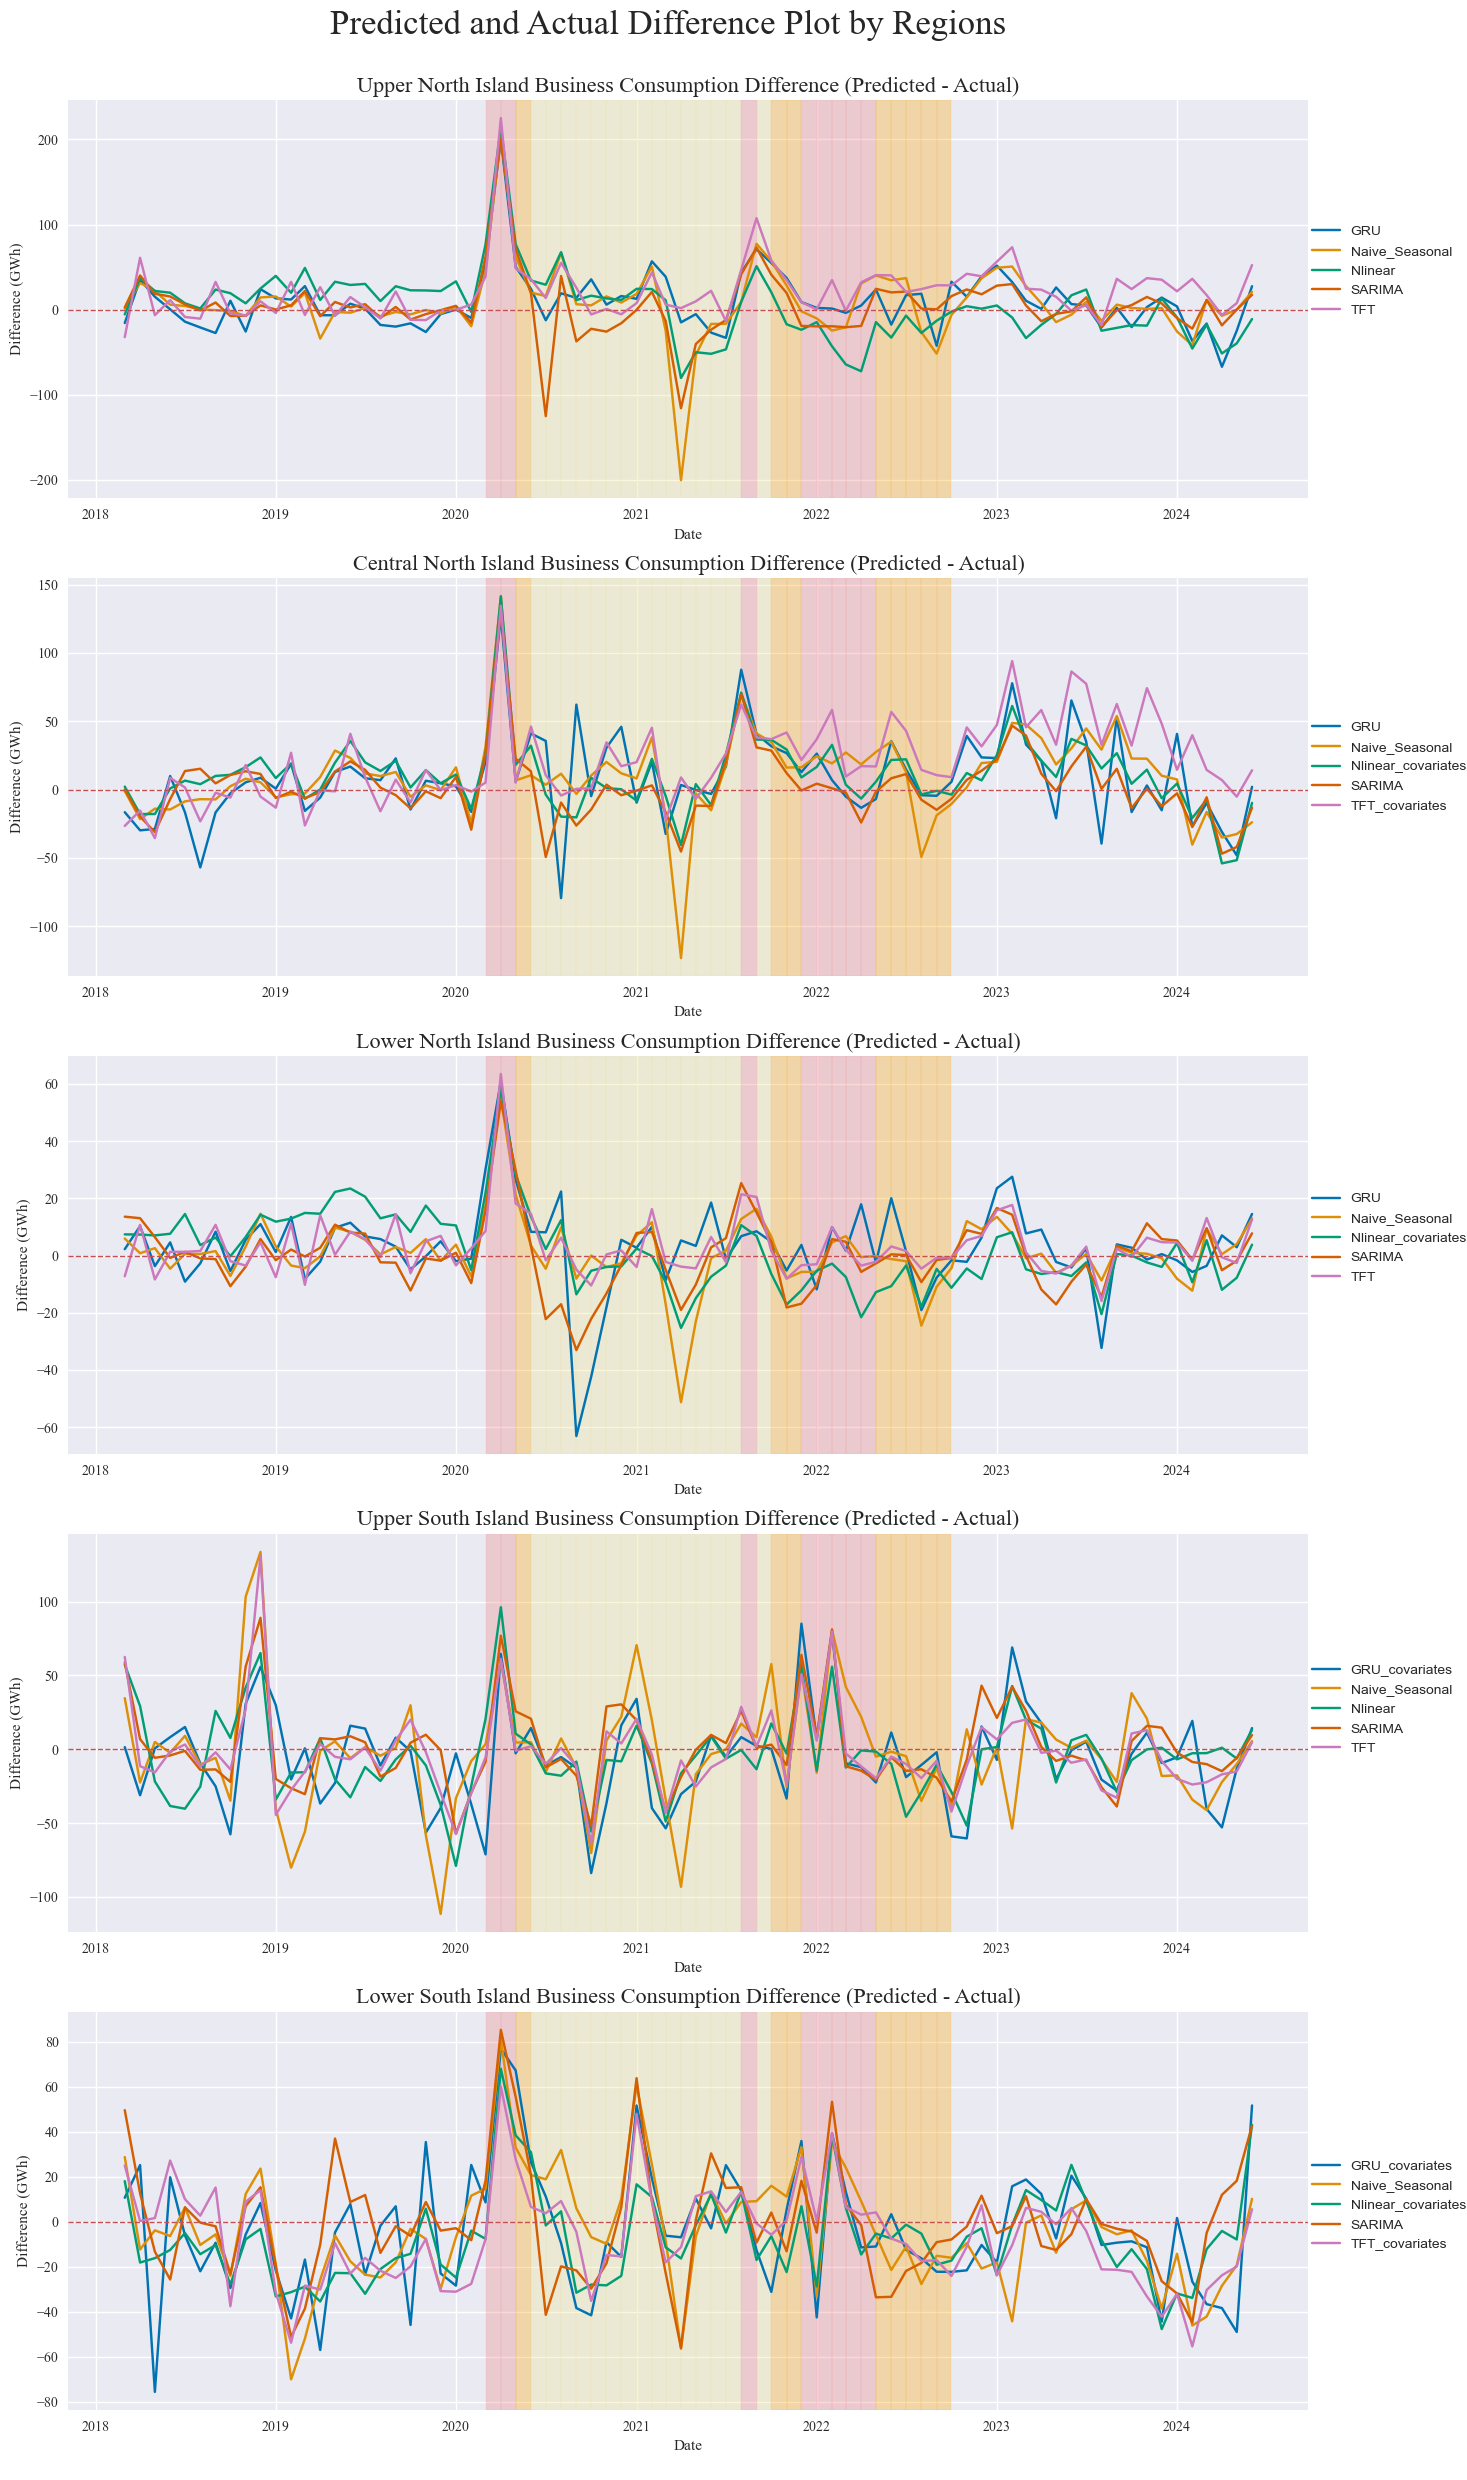

In [69]:
zones = ['uni', 'cni', 'lni', 'usi', 'lsi']
csv_files = []

for zone in zones:
    directory = '../plotting/bus/' + zone
    csv_files.extend([directory+"/"+f for f in os.listdir(directory) if f.endswith('.csv')])

color_palette = sns.color_palette("colorblind", 10)

plt.rcParams["font.serif"] = ["Times New Roman"]

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(16, 30), sharex=False)

fig.suptitle('Predicted and Actual Difference Plot by Regions', y=0.91, family='Times New Roman', fontsize = 25)

labels = []

for i in range(0, len(csv_files)): # Fir eacg zone, csv files are read and plotted
    color = color_palette[i % 5]
    if i < 5: # All upper north island
        df = pd.read_csv(csv_files[i], parse_dates=[0], index_col=0)
        ax1.plot(df.index, df['difference'], label=(csv_files[i][20:-12]), color=color)

    if  i > 4 and i < 10: # All central north island
        df = pd.read_csv(csv_files[i], parse_dates=[0], index_col=0)
        ax2.plot(df.index, df['difference'], label=(csv_files[i][20:-12]), color=color)

    if i > 9 and i < 15 : # All lower north island
        df = pd.read_csv(csv_files[i], parse_dates=[0], index_col=0)
        ax3.plot(df.index, df['difference'], label=(csv_files[i][20:-12]), color=color)

    if i > 14 and i < 20: # All upper south island
        df = pd.read_csv(csv_files[i], parse_dates=[0], index_col=0)
        ax4.plot(df.index, df['difference'], label=(csv_files[i][20:-12]), color=color)

    if i > 19 and i < 25: # All lower south island
        df = pd.read_csv(csv_files[i], parse_dates=[0], index_col=0)
        ax5.plot(df.index, df['difference'], label=(csv_files[i][20:-12]), color=color)
    
    labels.extend([csv_files[i][20:-12]])

for i, name in ((ax1, 'Upper North Island'), (ax2, 'Central North Island'), (ax3, 'Lower North Island'), (ax4, 'Upper South Island'), (ax5, 'Lower South Island')):
    for date, lockdown_color in lockdown_df['CNI'].items():
        i.axvspan(date, date + pd.DateOffset(months=1), color=lockdown_colors[lockdown_color], alpha=0.3)
    i.set_title(name + ' Business Consumption Difference (Predicted - Actual)', family='Times New Roman', fontsize = 16)
    i.set_xlabel('Date', family='Times New Roman')
    i.set_ylabel('Difference (GWh)', family='Times New Roman')
    i.axhline(y=0, color='r', linestyle='--', linewidth=1)  # Add a horizontal line at y=0
    i.set_xticklabels([j.get_text() for j in i.get_xticklabels()], family='Times New Roman')
    i.set_yticklabels([j.get_text() for j in i.get_yticklabels()], family='Times New Roman')



handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels,  loc = (0.89, 0.87))

handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels,  loc = (0.89, 0.67))

handles, labels = ax3.get_legend_handles_labels()
fig.legend(handles, labels,  loc = (0.89, 0.48))

handles, labels = ax4.get_legend_handles_labels()
fig.legend(handles, labels,  loc = (0.89, 0.29))

handles, labels = ax5.get_legend_handles_labels()
fig.legend(handles, labels,  loc = (0.89, 0.09))


C:\Users\Jackson\AppData\Local\Temp\ipykernel_12464\2419139044.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels([j.get_text() for j in axs.get_xticklabels()], family='Times New Roman')
C:\Users\Jackson\AppData\Local\Temp\ipykernel_12464\2419139044.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels([j.get_text() for j in axs.get_yticklabels()], family='Times New Roman')


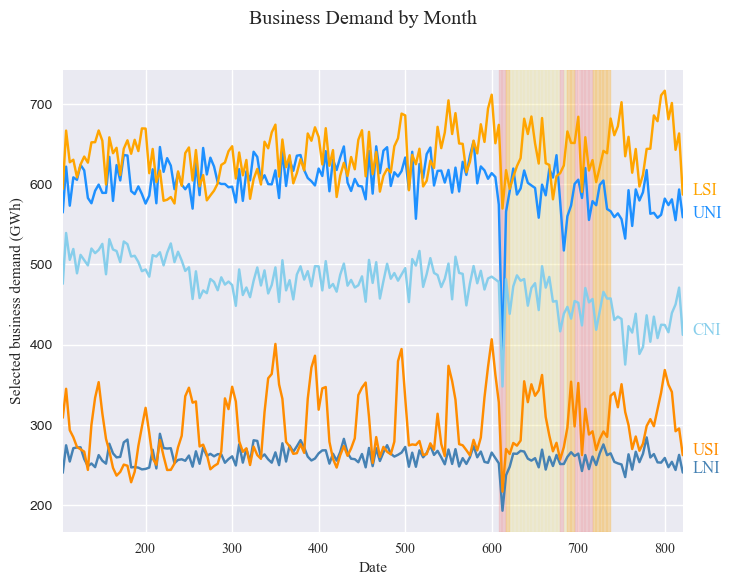

In [71]:
plt.rcParams["font.serif"] = ["Times New Roman"]
numeric_columns = ['Selected business demand (GWh)']

months = uni_climate_electricity['Date'].values.reshape(-1, 1)

fig, axs = plt.subplots(figsize=(8, 6))
fig.suptitle('Business Demand by Month', family='Times New Roman')

month_shift = months[-1] + pd.Timedelta(weeks=12)

label = 'UNI'
color = 'dodgerblue'
axs.plot(months, uni_climate_electricity[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (months[-1], uni_climate_electricity[numeric_columns].values[-1]),
  xytext = (month_shift, uni_climate_electricity[numeric_columns].values[-1]),
  color  = color,family='Times New Roman'
)


label = 'CNI'
color = 'skyblue'
axs.plot(months, cni_climate_electricity[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (months[-1], cni_climate_electricity[numeric_columns].values[-1]),
  xytext = (month_shift, cni_climate_electricity[numeric_columns].values[-1]),
  color  = color,family='Times New Roman'
)


label = 'LNI'
color = 'steelblue'
axs.plot(months, lni_climate_electricity[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (months[-1], lni_climate_electricity[numeric_columns].values[-1]),
  xytext = (month_shift, lni_climate_electricity[numeric_columns].values[-1]),
  color  = color,family='Times New Roman'
)

label = 'USI'
color = 'darkorange'
axs.plot(months, usi_climate_electricity[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (months[-1], usi_climate_electricity[numeric_columns].values[-1]),
  xytext = (month_shift, usi_climate_electricity[numeric_columns].values[-1]),
  color  = color, family='Times New Roman'
)


label = 'LSI'
color = 'orange'
axs.plot(months, lsi_climate_electricity[numeric_columns].values, color=color)
axs.annotate(label,
  xy = (months[-1], lsi_climate_electricity[numeric_columns].values[-1]),
  xytext = (month_shift, lsi_climate_electricity[numeric_columns].values[-1]),
  color  = color, family='Times New Roman'
)

#axs.axvline(x=months[-51], color='black', linestyle='--')
axs.set_xticklabels([j.get_text() for j in axs.get_xticklabels()], family='Times New Roman')
axs.set_xticklabels([j.get_text() for j in axs.get_yticklabels()], family='Times New Roman')

axs.set_xlim(months[1], months[-1])

axs.set_xlabel('Date', family='Times New Roman')
axs.set_ylabel('Selected business demand (GWh)', family='Times New Roman')

for date, lockdown_color in lockdown_df['CNI'].items():
    axs.axvspan(date, date + pd.DateOffset(months=1), color=lockdown_colors[lockdown_color], alpha=0.3)


